### TMA4215 Numerisk Matematikk 

Høst 2021 – Tuesday, October 19, 2021

R. Bergmann, E. Çokaj, O. P. Hellan 

# Project 2: Bézier Curves and Interpolation

### Notes

**Groups.** This project is a group project and can be solved in groups of _up to three_ students. Feel free to use for example the Forum to find each other. Eventually it will be possible to register groups in Inspera. One person (per group) can create a group and will get a PIN code which can be used by the other group members for registering.

**Requirements for submission.** The submission is in [Inspera](https://ntnu.inspera.no/). Each group must submit their onw report. It is not allowed to copy from other groups.

All code – also the tests – should be in individual cells that can just be run (as soon as the necessary functions are defined). Functions should only be used in cells _after_ their definition, such that an evaltuation in order of the notebook does not yield errors.

It is not possible to have an extension for this project.

**Supervision.** For questions the usual time, Thursday, 18.15–20.00 can be used. Questions can also be asked in the Mattelab forum.

### Submission Deadline
Tuesday, November 9, 2021.

## Introduction

In this project we consider another possibility to perform interpolation with piecewise polynomials, namely from the family of parametrized curves.

Let $\mathbf p_0,\ldots, \mathbf p_n\in \mathbb R^d$ (usually $d=2$ or $d=3$) denote $n+1$ ordered points.

Then the $n$th degree Bézier curve is defined by

$$
\mathbf c(t) = \mathbf b_n(t; \mathbf p_0,\ldots,\mathbf p_n) = \sum_{i=0}^{n} B_{i,n}(t)\mathbf{p}_i,
$$

where $B_{n,i}(t)$ are the $n$th degree _Bernstein polynomials_. We use the first notation, $\mathbf c(t)$ when the points are clear from context, and the second, $\mathbf b(t; \mathbf p_0,\ldots,\mathbf p_n)$ to emphasize the dependency of the nodes and/or the degree $n$.

$$
  B_{i,n}(t) = {n \choose i}t^i(1-t)^{n-i}, \qquad i=0,\ldots,n,
$$

where ${n \choose i} = \frac{n!}{i!(n-i)!}$ denotes the binomial coefficient.

To get familiar with the first few Bernstein polynomials it might be good to write down $B_{0,0}, B_{0,1}, B_{1,1}, B_{0,2}, B_{1,2},$ and $B_{2,2}.$ 

## Problem 1: Properties of Bernstein polynomials

Let $n\in \mathbb N$ be given. We consider the Bernstein polynomials $B_{i,n}(t)$, $i=0,\ldots,n$.

1. Show that $B_{i,n}(t) \geq 0$ for all $t\in [0,1]$.

**Solution**

The Bernstein polynomials are given by 
$$
B_{i,n}(t) = {n\choose i}t^i(1-t)^{n-i}\quad i = 0,...,n.
$$
Since $t\in[0,1]$ then $t^i\in[0,1]$ and $(1-t)\in[0,1]$ so $(1-t)^{n-i}\in [0,1]$. Now the binomial coefficient are given by 
$$
{n \choose i} = \frac{n!}{i!(n-i)!}
$$
And since $0\leq i\leq n$ then $i! \geq 0$ and $(n-i)\geq 0$ so that $(n-i)! \geq 0$. $n!$ is also greater than $0$. 

Thus the Bernstein polynnomial only consist of positive factors, and must therefore be positive aswell $\implies B_{i,n}(t) \geq 0 \quad\forall t\in [0,1]$.

2. Show that the Bernstein polynomials for $0<i<n$ can be recursively defined by
  
   $$
   B_{i,n}(t) = (1-t)B_{i,n-1}(t) + tB_{i-1,n-1}(t), \qquad t \in [0,1].
   $$
  
   How does this look like for $B_{0,n}$ and $B_{n,n}$? 

**Solution**

First off, we look at how $B_{i,n-1}(t)$ and $B_{i-1,n-1}(t)$ looks like:

$$
B_{i,n-1}(t) = {n-1 \choose i} t^i(1-t)^{n-i-1}
$$

$$
B_{i-1,n-1}(t) = {n-1 \choose i-1}t^{i-1}(1-t)^{n-i}.
$$

We know that the binomial coefficient can be expressed as a sum of elements in pascals triangle, which gives the well known formula 

$$
{n \choose i} = {n -1 \choose i} + {n -1 \choose i -1}.
$$
with starting values

$$
{n \choose 0} = {n\choose n } = 1
$$

This gives that 
$$
B_{i,n}(t) = {n -1 \choose i}t^i(1 -t)^{n-i} + {n -1 \choose i -1}t^i(1 -t)^{n-i} = (1-t)B_{i,n-1}(t) + tB_{i-1,n-1}
$$

We then look at $B_{0,n}$ and $B_{n,n}$.

$$
B_{0,n} = (1-t)B_{0,n-1}(t) + tB_{-1,n-1} = {n-1 \choose 0}(1-t)^{n} + {n-1 \choose -1}(1-t)^n = (1-t)^n \Bigg(\frac{(n-1)!}{(n-1)!} + \frac{(n-1)!}{(-1)!(n+1)!}\Bigg) = (1-t)^n\Bigg(1 + \frac{1}{(-1)!(n+1)n}\Bigg)
$$
We can express the factorial as $(n-1)! = \frac{n!}{n}$ this gives that (-1)! is not defined since we get division by zero, however we can look at $\frac{1}{(-1)!} = \frac{0}{0!} = 0$. Therefore we get that $B_{-1,n}(t) = 0$, which gives
$$
B_{0,n} = (1-t)^n.
$$

We further compute $B_{n,n}$.
$$
B_{n,n} = (1-t)B_{n,n-1}(t) + tB_{n-1,n-1}(t) = {n-1 \choose n}t^n + {n-1 \choose n-1}t^{n-1} = t^n\frac{(n-1)!}{n!(-1)!} + t^{n}\frac{(n-1)!}{(n-1)!0!} = t^{n}.
$$
Since $1/(-1)! = 0$ so that $B_{n,n-1}(t) = 0$.

3. Show that the $B_{i,n}(t)$ form a partition of unity, i.e.
   $$
   \sum_{i=0}^n B_{i,n}(t) = 1 \qquad \text{ for } t \in [0,1].
   $$
   _Hint_: Use induction by $n$.

**Solution**

Proof by induction:

We first look at the case when $n = 0$, then the only value $i$ can be is $0$.

$$
\sum_{i=0}^0 B_{i,0}(t) = B_{0,0}(t) = {0\choose 0}t^0 (1-t)^0 = 1.
$$
The formula holds for the base case, assuming now that it holds up to $n-1$, must then show that it holds for $n$ as well.

$$
\sum_{i = 0}^{n}B_{i,n}(t) = \sum_{i= 0}^n(1-t)B_{i,n-1}(t) + tB_{i,n-1}(t) = (1-t)\sum_{i=0}^nB_{i,n-1}(t) +t\sum_{i=0}^nB_{i-1,n-1}(t)
$$

We know that $\sum_{i = 0}^{n-1} B_{i,n-1}(t) = 1$. Therefore we have that $\sum_{i=0}^nB_{i,n-1}(t) = 1 + B_{n,n-1}(t)$ and that $\sum_{i=0}^nB_{i-1,n-1}(t) = 1 +  B_{-1,n-1}(t)$. In the previous task we found that $B_{n,n-1}(t) = B_{-1,n-1}(t) = 0$, thus we have that
$$
\sum_{i = 0}^{n}B_{i,n}(t) = (1-t) + t = 1.
$$
Therefore by induction we have that the formula holds for all $n$.

4. Show that the derivative is given by
   
   $$
   B_{i,n}'(t) =  n(B_{i-1,n-1}(t) - B_{i,n-1}(t))
   $$
   
   with $B_{-1,n-1}(u) \equiv B_{n,n-1}(u) \equiv 0$.

**Solution**

Since $B_{i,n}(t) = {n\choose i}t^i(1-t)^{n-i}$ then the derivative must be

$$
\frac{d}{dt} B_{i,n}(t) = \frac{d}{dt}\Bigg({n\choose i}t^i(1-t)^{n-i}\Bigg) = \frac{n!}{i!(n-i)!}\Big(it^{i-1}(1-t)^{n-i} -(n-i)t^i(1-t)^{n-i-1}\Big) \\
=\frac{n\cdot(n-1)!}{(i-1)!(n-i)!}t^{i-1}(1-t)^{n-i} - \frac{n\cdot(n-1)!}{i!(n-i-1)!}t^i(1-t)^{n-i-1} = n\Bigg({n-1\choose i-1}t^{i-1}(1-t)^{n-i} - {n-1\choose i}t^i(1-t)^{n-i-1}\Bigg) = n\left(B_{i-1,n-1}(t) - B_{i,n-1}(t)\right).
$$
Which was what we wanted to show.

5. Implement a function `Bernstein(i,n,t)` that evaluates $B_{i,n}$ at $t$ and plot all functions $B_{i,n}$, $i=0,\ldots,n$ for $n=3$ and $n=9$.

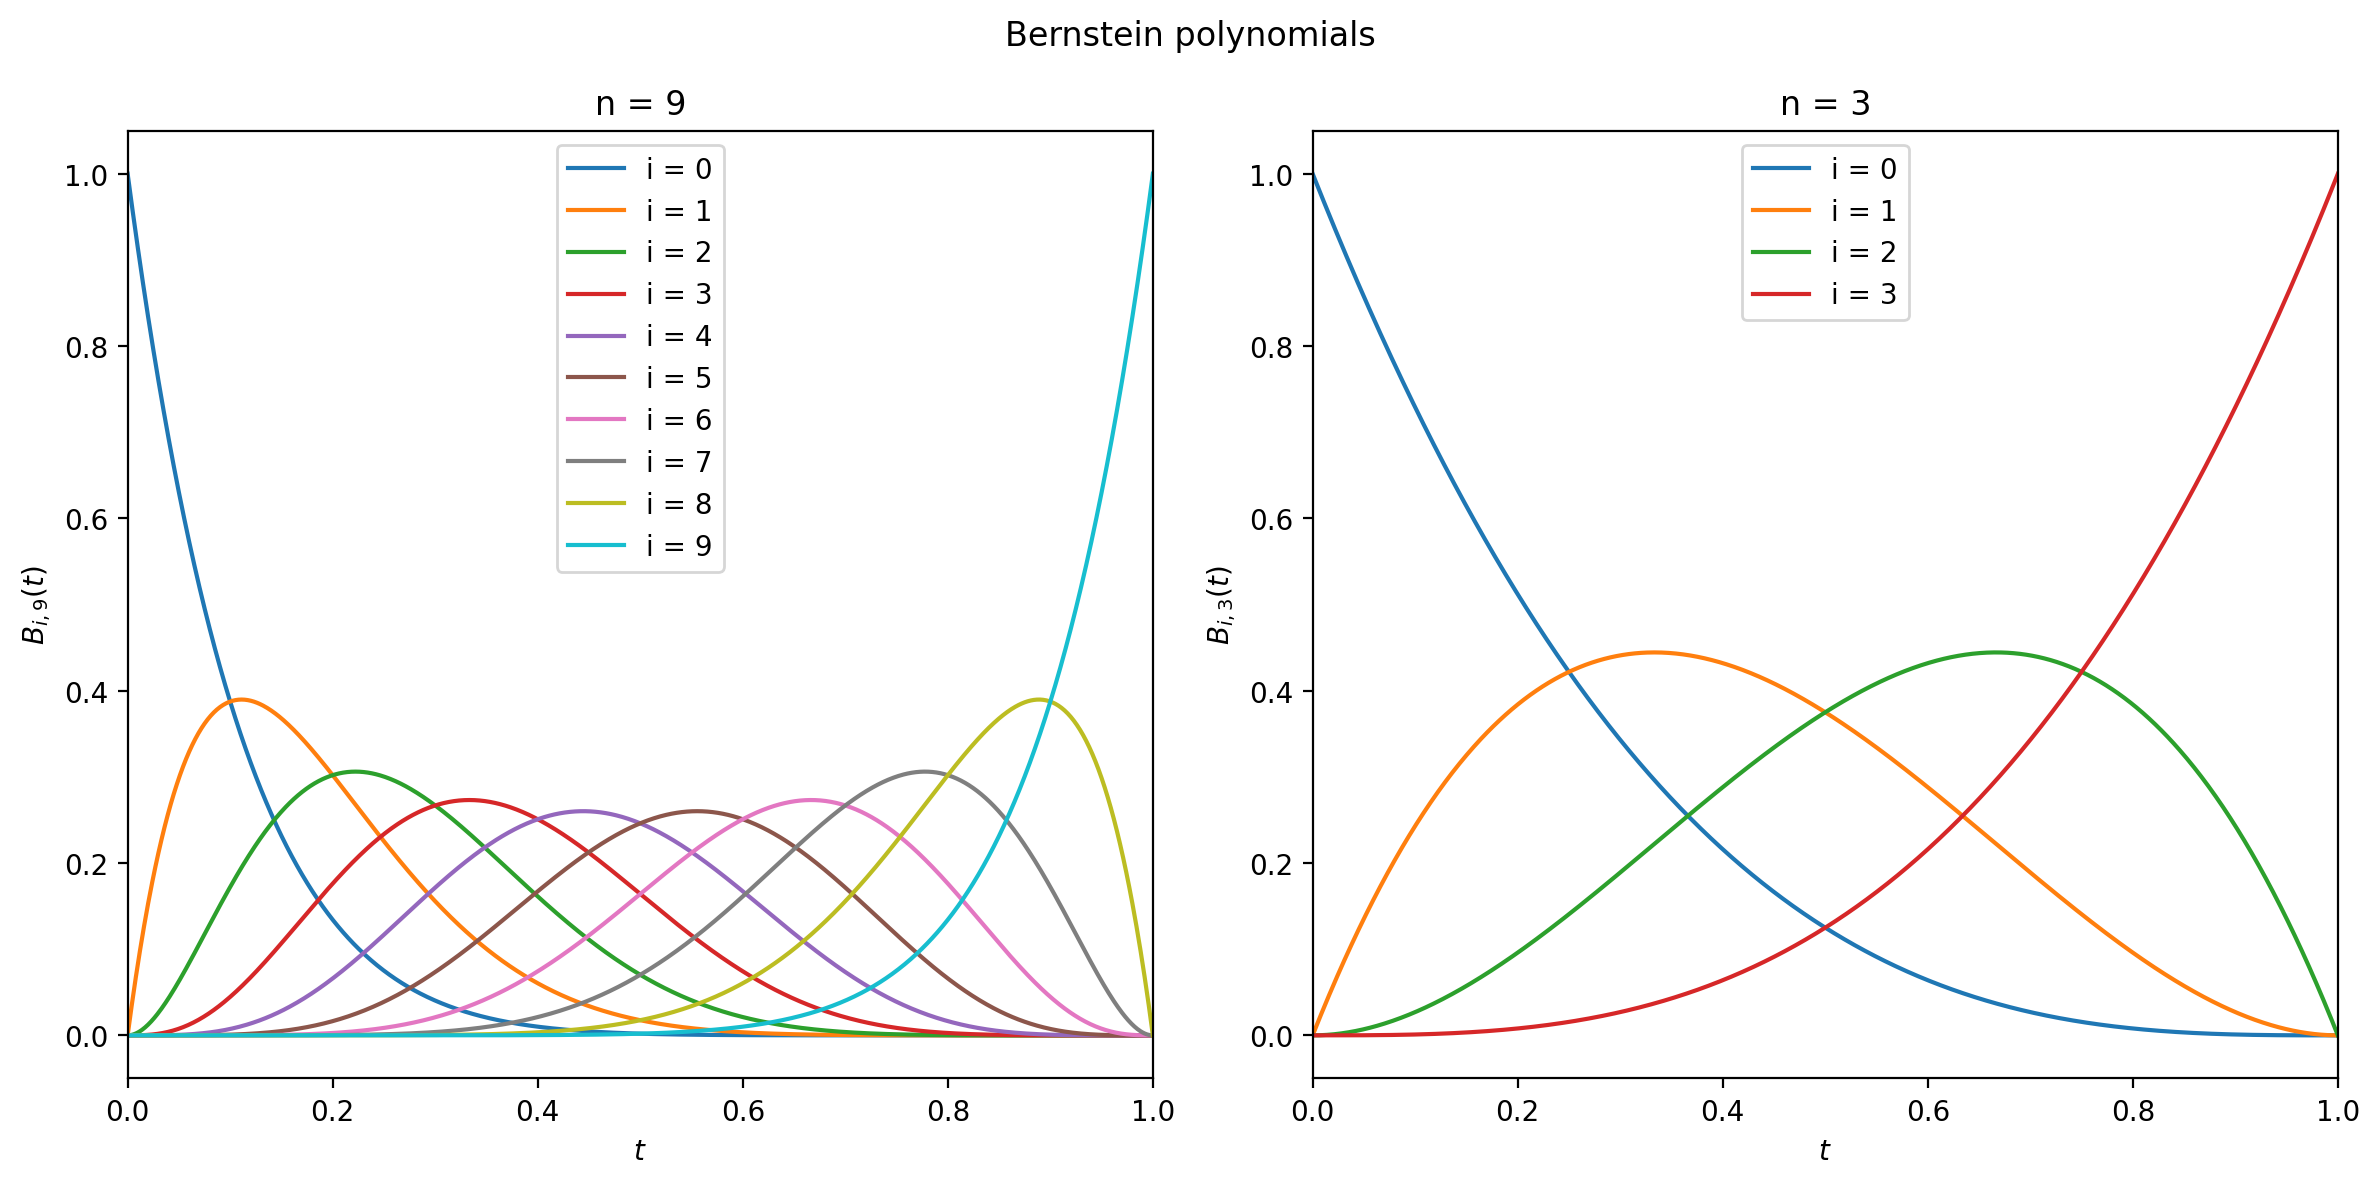

In [2]:
import numpy as np
import math
import matplotlib.pyplot as plt
import matplotlib as mpl
from scipy.special import binom 

%matplotlib inline
plt.rcParams['figure.figsize'] = [12, 6]
plt.rcParams['figure.dpi'] = 200


def Bernstein(i,n,t):
    '''Bernstein(i,n,t)
    simple function that returns the Bernstein polynomial of nth degree at index i as a function of t
    
    input:
    i: index number i, should be in the range [0,n]
    n: the degree
    t: array of points which the function is to be evalueted at.
    '''
    return binom(n,i) *  t**i * (1-t)**(n-i)

    
N = 10 #Number of n's
t = np.linspace(0,1,1000) #t array
B = np.zeros((N,N,t.size)) #allocationg storage for the first N - bernstein polynomials
for n in range(N): #Iterate through all the n's
    for i in range(n+1): #Iterate through all the i's
        B[i,n] = Bernstein(i,n,t) #Find the bernstein polynomial B_i,n (t)
        
fig, axs = plt.subplots(1,2) #Plot figure as two subplots
for i in range(10): #Iterate through all the i's for B_i,9(t)
    axs[0].plot(t, B[i,9], label = f'i = {i}') #Plot the polynomials
    
axs[0].legend() #Make plots look nice
axs[0].set_xlabel(r'$t$')
axs[0].set_ylabel(r'$B_{i,9}(t)$')
axs[0].set_xlim(0,1)
axs[0].set_title('n = 9')
fig.suptitle('Bernstein polynomials')


for i in range(4):#Iterate through all the i's for B_i,3(t)
    axs[1].plot(t, B[i,3], label = f'i = {i}') #plot the polynomials
    
axs[1].legend() #make the plot look nice
axs[1].set_title('n = 3')
axs[1].set_xlabel(r'$t$')
axs[1].set_ylabel(r'$B_{i,3}(t)$')
axs[1].set_xlim(0,1)
plt.tight_layout()
plt.show()




## Problem 2: Properties of (composite) Bézier curves

We consider the points $\mathbf p_0,\ldots,\mathbf p_n \in \mathbb R^d$ and $\mathbf q_0,\ldots \mathbf q_n\in \mathbb R^d$ and their corresponding Bézier curves $\mathbf c(t) = \mathbf b(t; \mathbf p_0,\ldots,\mathbf p_n)$ and $\mathbf d(t) = \mathbf b(t; \mathbf q_0,\ldots, \mathbf q_n)$, respectively.

In this problem, we will also consider _composite Bézier curves_, or piecewise Bézier curves, e.g. a curve $\mathbf s \colon [0,2] \to \mathbb R^d$ defined by

$$
\mathbf s(t) = \begin{cases}
  \mathbf c(t) & \text{ for } 0 \leq t < 1\\
  \mathbf d(t-1) & \text{ for } 1 \leq t \leq 2.
\end{cases}
$$

1. Compute the first two derivatives $\mathbf c'(t)$ and $\mathbf c''(t)$ of $\mathbf c(t).$

**Solution**

We first find the derivative of $\mathbf c(t)$.

$$
\frac{d}{dt}\mathbf c(t) = \frac{d}{dt}\mathbf b_n(t; \mathbf p_0,\ldots,\mathbf p_n) = \frac{d}{dt}\sum_{i=0}^{n} B_{i,n}(t)\mathbf{p}_i = \sum_{i = 0}^{n}\mathbf{p}_i\frac{d}{dt}B_{i,n}(t)
$$

$$
=\sum_{i = 0}^{n}\mathbf{p}_i n\left(B_{i-1,n-1}(t) - B_{i,n-1}(t)\right) = n\sum_{i = 0}^{n}\mathbf{p}_i \left(B_{i-1,n-1}(t) - B_{i,n-1}(t)\right).
$$
Then we find the second derivative by taking the derivative of $\mathbf c'(t)$.

$$
\frac{d}{dt}\mathbf c'(t) = n\sum_{i = 0}^{n}\mathbf{p}_i \frac{d}{dt}\left(B_{i-1,n-1}(t) - B_{i,n-1}(t)\right) = n\sum_{i = 0}^n\mathbf P_i (n-1)\left(B_{i-2,n-2}(t) - B_{i-1,n-2}(t) + B_{i,n-2}(t) - B_{i-1,n-2}(t)\right)
$$
$$
= n(n-1)\sum_{i = 0}^n\mathbf P_i \left(B_{i-2,n-2}(t) + B_{i,n-2}(t) - 2B_{i-1,n-2}(t)\right) .
$$



2. What values does $\mathbf c(t)$ attend at its end points? State $\mathbf c(0)$ and $\mathbf c(1).$

**Solution**

We recall first that $B_{0,n} = (1-t)^n$ and that $B_{n,n} = t^n$. At $t= 0$ we get
$$
\mathbf c(0) = \mathbf b_n(0; \mathbf p_0,\ldots,\mathbf p_n) = \sum_{i=0}^{n} B_{i,n}(0)\mathbf{p}_i = (1-0)^n \mathbf p_0 + \sum_{i=1}^{n}{n\choose i}0^i(1-0)^{n-i}\mathbf{p}_i = \mathbf p_0.
$$

At $t = 1$ we get
$$
\mathbf c(1) = \mathbf b_n(1; \mathbf p_0,\ldots,\mathbf p_n) = \sum_{i=0}^{n} B_{i,n}(1)\mathbf{p}_i = 1^n + \mathbf p_n + \sum_{i=0}^{n-1}{n\choose i}1^i(1-1)^{n-i}\mathbf{p}_i = \mathbf p_n.
$$
So at the endpoints, the Bézier curve is the endpoint control point.

3. Prove that the following properties hold:
   1. $\mathbf c'(0) = n(\mathbf p_1-\mathbf p_0),$
   2. $\mathbf c''(0) = n(n-1)(\mathbf p_0-2\mathbf p_1 + \mathbf p_2),$
   3. $\mathbf c'(1) = n(\mathbf p_n-\mathbf p_{n-1}),$
   4. $\mathbf c''(1) = n(n-1)(\mathbf p_n-2\mathbf p_{n-1} + \mathbf p_{n-2}).$

**Solution**

* **A and C**:
We know that the derivative is
$$
\mathbf c'(0) = n\sum_{i = 0}^{n}\mathbf{p}_i \left(B_{i-1,n-1}(t) - B_{i,n-1}(t)\right).
$$
We look closer at $B_{s(i),n-1}(t)$, where $s(i)$ is a function of the index $i$.
$$
B_{s(i),n-1}(t) = {n-1\choose s(i)}t^{s(i)}(1-t)^{n-1-s(i)}
$$
We observe that when $s(i) = 0$ we get
$$
B_{0,n-1}(t) = {n-1\choose 0}t^{0}(1-t)^{n-1} = (1-t)^{n-1}.
$$
Meaning that when $t = 0$ we have
$$
B_{s(i) = 0,n-1}(0) = 1 \quad \text{and} \quad B_{s(i) \neq 0,n-1}(0) = 0 .
$$
Therefore will $B_{i-1,n-1}(0) =1$ if $i = 1$ and zero elsewhere. On the other hand we have that $B_{i,n-1}(0) = 1$ if $i = 0$ and zero elsewhere. This gives that
$$
\mathbf c'(0) = \sum_{i = 0}^{n}\mathbf p_i\left(B_{i-1,n-1}(0) - B_{i,n-1}(0)\right) = n(\mathbf p_1 - \mathbf p_0).\blacksquare
$$
We further obseve that when $s(i) = n-1$ we get
$$
B_{1,n-1}(t) = {n-1\choose n-1}t^{n-1}(1-t)^{0} = t^{n-1}.
$$
Meaning that at $t = 1$ we have
$$
B_{s(i) = n-1,n-1}(1) = 1 \quad \text{and} \quad B_{s(i) \neq n-1,n-1}(0) = 0 .
$$
Which gives that $B_{i-1,n-1}(1) = 1$ if $i = n$ and zero elsewhere, and that $B_{i,n-1}(1) = 1$ if $i = n-1$ and zero elsewhere. Thus we have that 
$$
\mathbf c'(1) = \sum_{i = 0}^{n}\mathbf p_i\left(B_{i-1,n-1}(1) - B_{i,n-1}(0)\right) = n(\mathbf p_n - \mathbf p_{n-1}).\blacksquare
$$

* **B and D**:
We know that the second derivative is 
$$
\mathbf c''(t) =  n(n-1)\sum_{i = 0}^n\mathbf P_i \left(B_{i-2,n-2}(t) + B_{i,n-2}(t) - 2B_{i-1,n-2}(t)\right) .
$$
We look closer at $B_{s(i),n-2}(t)$.
$$
B_{s(i),n-2}(t) = {n-2\choose s(i)}t^{s(i)}(1-t)^{n-2-s(i)}
$$
Easy then to see that if $s(i) = 0$ we get
$$
B_{0,n-2}(t) = {n-2\choose 0}t^{0}(1-t)^{n-2} = (1-t)^{n-2}
$$
Meaning that for $t = 0$ we have
$$
B_{s(i) = 0, n-2}(0) = 1 \quad \text{and} \quad B_{s(i) \neq 0, n-2}(0) = 0. 
$$
This gives that 
$$
\mathbf c''(0) = n(n-1) \sum_{i= 0}^{n}\mathbf p_i\left(B_{i-2,n-2}(0) + B_{i,n-2}(0) - 2B_{i-1,n-2}(0)\right) = n(n-1)\left(\mathbf p_2 + \mathbf p_0 - 2\mathbf p_1\right).\blacksquare
$$
We further(again) observe that when $s(i) = n-2$ we get
$$
B_{n-2,n-2} = {n-2\choose n-2}t^{n-2}(1-t)^0 = t^{n-2}.
$$
Meaning that for $t = 1$ we have
$$
B_{s(i) = n-2, n-2}(1) = 1 \quad \text{and} \quad B_{s(i) \neq n-2, n-2}(0) = 0.
$$
Which gives that 
$$
\mathbf c''(1) = n(n-1)\sum_{i= 0}^{n}\mathbf p_i\left(B_{i-2,n-2}(1) + B_{i,n-2}(1) - 2B_{i-1,n-2}(1)\right) = n(n-1)(\mathbf p_n + \mathbf p_{n-2} - 2\mathbf p_{n-1}).\blacksquare
$$

4. Use the recursion property of Bernstein polynomials to prove the recursive definition
   $$
   \mathbf b_n(t; \mathbf p_0,\ldots,\mathbf p_n) = (1-t)b_{n-1}(t; \mathbf p_0,\ldots,\mathbf p_{n-1}) + tb_{n-1}(t; \mathbf p_1,\ldots,\mathbf p_n).
   $$

**Solution**

Since 
$$
B_{i,n}(t) = (1-t)B_{i,n-1}(t) + tB_{i-1,n-1}(t),
$$
the Bézier curve can be written as
$$
\mathbf b_n(t;\mathbf p_0,...\mathbf p_n) = \sum_{i = 0}^{n}B_{i,n}(t)\mathbf p_i = (1-t)\sum_{i = 0}^{n}B_{i,n-1}(t) + t\sum_{i = 0}^nB_{i-1,n-1}(t)\mathbf p_i.
$$
Now since $B_{n,n-1}(t) = B_{-1,n-1}(t) = 0$ we get 
$$
\mathbf b_n(t;\mathbf p_0,...\mathbf p_n) = (1-t)\sum_{i = 0}^{n-1}B_{i,n-1}(t) + t\sum_{i = 1}^n B_{i-1,n-1}(t)
\mathbf p_i =(1-t)\mathbf b_{n-1}(t;\mathbf p_0,...,\mathbf p_{n-1}) + t\mathbf b_{n-1}(t;\mathbf p_1,...,\mathbf p_n).\blacksquare
$$

5. The recursion from point 4 of this problem can be used to define the so-called “de Casteljau” algorithm to evaluate $\mathbf b_n(t_0; ; \mathbf p_1,\ldots,\mathbf p_n)$ at $t_0 \in [0,1]$ algorithm:
   
   Starting with $\mathbf p_{0,i}(t_0) = \mathbf p_i$ compute for $k=0,\ldots,n$ and $i=0,\ldots,k$
   
   $$
   \mathbf p_{k,i}(t_0) = (1-t_0)\mathbf p_{k-1,i}(t_0) + t_0\mathbf p_{k-1,i+1}(t_0),
   $$
   then $\mathbf b_n(t_0; ; \mathbf p_1,\ldots,\mathbf p_n) = \mathbf p_{n,0}.$
   
   Implement a function `deCasteljau(P,t)` where `P` is a vector – of $n+1$ points – to evaluate the corresponding  Bézier curve at $t$.
   
   This function should also return (as a second return value) a vector `Pvecs` that contains a vector of points for every “level” $k$ considered.
   
   Plot the corresponding curve for the points 
   
   $$
   \mathbf p_{0} = \begin{pmatrix}0\\0\end{pmatrix},\quad
   \mathbf p_{1} = \begin{pmatrix}2\\3\end{pmatrix},\quad
   \mathbf p_{2} = \begin{pmatrix}4\\0\end{pmatrix},\quad
   \mathbf p_{3} = \begin{pmatrix}6\\-3\end{pmatrix},\quad
   \mathbf p_{4} = \begin{pmatrix}8\\0\end{pmatrix},
   $$
   
   including one line per “level” $k$ connecting the points when evaluating the curve at $t_0 = \frac{1}{3}$

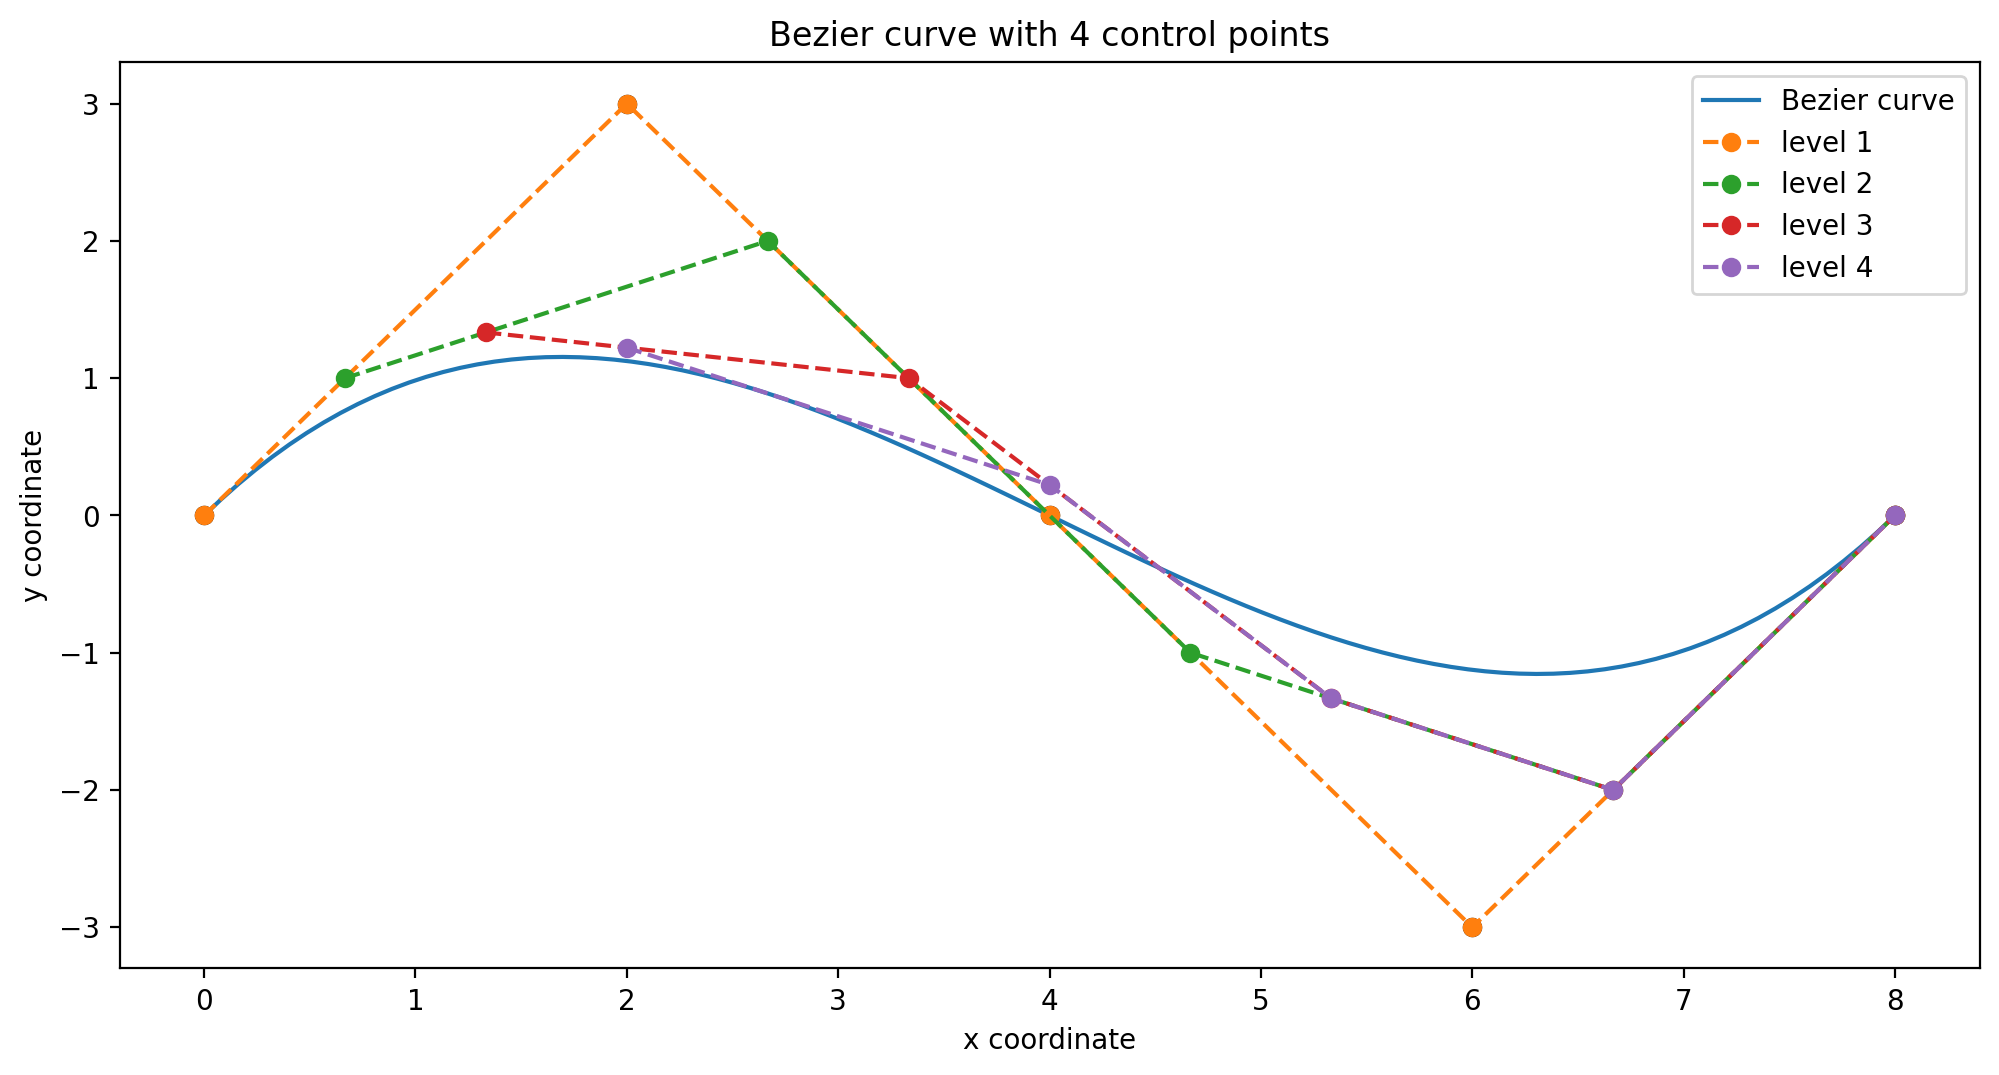

In [3]:
import numpy as np
import math
import matplotlib.pyplot as plt
import matplotlib as mpl
from scipy.special import binom 

#%matplotlib inline
plt.rcParams['figure.figsize'] = [12, 6]
plt.rcParams['figure.dpi'] = 200




def Casteljau(P,t,i = 0,k = None):
    '''Casteljau(P,t,i,j)
    recursive implementation of casteljaus algorithm
    
    
    input:
    
    P: array of points, 1dimensional
    t: float/int or array of floats/ints 
    i: index number i as in task description, default value of 0
    k: index k as in task description, default value of None
    
    output:
    point: float or array of points gives the bezier curve/point at t 
    
    '''
    if k == None: #We are in first call, set i = 0, k = n and start the scheme
        return Casteljau(P,t,0,len(P)-1)
    elif k == 0: #starting condition
        return P[i]
    else:
        return Casteljau(P,t,i,k-1) * (1-t) + Casteljau(P,t,i+1,k-1) * t #the recursicve scheme found in task 2.4


def Bezier(P,tstart = 0,tsize = 100,pvec = False):
    '''
    Bezier(P)
    Finds the bezier curve given control points P
    
    input:
    P: array, multidimensional, contains the set of control points. On form [[p11,p12,...p1n],[p21,p22,...,p2n],...]
    tstart: where the paremeterization begins, default value of 0
    tsize: number of parameterization points, defualt of 100 points
    pvec: bool, set to True if you want the Pvec, default value of False
    
    output:
    c: array/matrix of dimensions "controlpoint dimension" x "number of t-values in tvec"
            Contains the bezier curve for each dimension of the control points.
    Pvec: array/matrix of dimensions "controlpoint dimension" x "number of controlpoints -1" x "number of controlpoints"
            Contains all the lines per level k for paremetarization at t0 = 1/3
            only returned if pvec = True
    '''
    
    d = P[0].size #dimension
    n = P[:,0].size #number of points
    tvec = np.linspace(0,1,tsize)  #Parametarization
    c = np.zeros((d,tsize)) #Allocate storage

    for p in range(d): #Iterate through each coordinate
        c[p] = Casteljau(P[:,p],tvec) #Get the point in this paremeteraization value using Casteljaus algortihm
    
    if pvec: #If the user wants the pvec
        Pvec = np.zeros((d,n-1,n)) #allocate storage
        t0 = 1/3
        for p in range(d): #iterate through the dimensions
            for j in range(1,n): #iterate through all the points
                for k in range(n): #iterate through all the level ks
                    Pvec[p,j-1,k] = Casteljau(P[k:j+k,p],t0) #Use casteljau algortihm to get point
        return c,Pvec 
    return c
    



P = np.array([[0,0],[2,3],[4,0],[6,-3],[8,0]]) #Control points
c,pvec = Bezier(P,pvec = True) #Bezier curve and pvec


plt.plot(c[0],c[1],label = 'Bezier curve') #Plot the bezier curve
for k in range(len(P[:,0])-1): #iterate through all the levels
    plt.plot(pvec[0,k],pvec[1,k],'--o', label = f'level {k+1}') #plot the line segments at each level
    
plt.scatter(P[:,0],P[:,1], color = 'black') #Plot the control points
plt.title('Bezier curve with 4 control points')
plt.xlabel('x coordinate')
plt.ylabel('y coordinate')
plt.legend()
plt.show()

6\. Consider a _composite Bézier curve_ $\mathbf s(t)$ as described in the beginning of this problem. Assume we want $\mathbf s(t)$ to be a $C^{(k)}$, $k=0,1,2$ function. Then surely, increasing the class $k$ increases the dependent properties we have to impose.
   1. What are the critical points of $\mathbf s(t)$ to investigate for the property to be a $C^{(k)}$ function?
   2. Which properties have to hold for continuity ($k=0$)? 
   3. Which properties have to hold for $\mathbf s(t)$ to be continuously differentiable ($k=1$) ?
   4. Which properties have to hold for $\mathbf s(t)$ to be twice continuously differentiable ($k=2$) ?
   
   Try to simplify the conditions for the third and fourth point based on the properties you derived before.
   
   5. What changes if we want $\mathbf s(t)$ to be periodic, i.e. $s(t) = s(2+t)$ for all $t$ for the continous differentiability case $k=1$? 

**Solution**

Recalls that the composite Bézier curve is given by
$$
\mathbf s(t) = \begin{cases}
  \mathbf c(t) & \text{ for } 0 \leq t < 1\\
  \mathbf d(t-1) & \text{ for } 1 \leq t \leq 2.
\end{cases}
$$
1. The natural critical point to investigate $\mathbf s(t)$ is at $t = 1$ where we go from $\mathbf c(t)$ to $\mathbf d(t-1)$.


2. Continuity demands that 
$$
\lim_{t\rightarrow 1^+} \mathbf s(t) = \lim_{t \rightarrow 1^-}\mathbf s(t)
$$
which is the same as demanding that
$$
\lim_{t\rightarrow 1^+} \mathbf c(t) = \lim_{t \rightarrow 1^-}\mathbf d(t-1).
$$
We know from problem 2.2 that at the endpoints where $t = 0$ and $t = 1$ the Bézier curve holds the value of the controlpoint endpoints.
$$
\implies \lim_{t\rightarrow 1^+} \mathbf c(t) = \mathbf c(1) =\mathbf p_n \quad \text{and} \quad \lim_{t \rightarrow 1^-}\mathbf d(t-1) = \mathbf d(0) = \mathbf q_0.
$$
Thus the limits are equal if $\mathbf q_0 = \mathbf p_n$ , and thus $\mathbf s(t)$ is continous if $\mathbf q_0 = \mathbf p_n$.


3. For $\mathbf s(t)$ to be continuously differentiable the derivative $\mathbf s'(t)$ must exist and be continous for all $t$. We have allready found the derivative of a Bézier curve, which gives that the derivative of $\mathbf s(t)$ is
$$
\mathbf s'(t) = \begin{cases}
  \mathbf c'(t) & \text{ for } 0 \leq t < 1\\
  \mathbf d'(t-1) & \text{ for } 1 \leq t \leq 2.
\end{cases}
$$
$$
=\begin{cases}
  n\sum_{i = 0}^{n}\mathbf{p}_i \left(B_{i-1,n-1}(t) - B_{i,n-1}(t)\right) & \text{ for } 0 \leq t < 1\\
  n\sum_{i = 0}^{n}\mathbf{q}_i \left(B_{i-1,n-1}(t-1) - B_{i,n-1}(t-1)\right) & \text{ for } 1 \leq t \leq 2.
\end{cases}
$$
Which is just a sum of Bernstein polynomials, is thus welldefined at every t. Must then investigate continutity of $\mathbf s'(t)$ at $t = 1$. Continuity demands that 
$$
\lim_{t\rightarrow 1^+} \mathbf c'(t) = \lim_{t \rightarrow 1^-}\mathbf d'(t-1)
$$
Using the properties form problem 2.3 we get that 
$$
\lim_{t\rightarrow 1^+} \mathbf c'(t) = \mathbf c'(1) = n(\mathbf p_n-\mathbf p_{n-1}) \quad \text{and} \quad \lim_{t \rightarrow 1^-}\mathbf d'(t-1) = \mathbf d'(0) = n(\mathbf q_1-\mathbf q_{0})
$$
Thus if $\mathbf s'(t)$ is to be continuously differentiable, then we must have that $\mathbf q_1-\mathbf q_{0} = \mathbf p_n-\mathbf p_{n-1}$. If we know assumes continutiy($k = 1$) then we only need to demand that $\mathbf p_{n-1}  = 2\mathbf q_0 - \mathbf q_{1}$.


4. For $\mathbf s(t)$ to be twice continuously differentiable we must again have that the second derivative $s''(t)$ exist and be continous for all $t$. Using the result from problem 2.1 we get that the second derivative is 
$$
\mathbf s''(t) = \begin{cases}
  \mathbf c''(t) & \text{ for } 0 \leq t < 1\\
  \mathbf d''(t-1) & \text{ for } 1 \leq t \leq 2.
\end{cases}
$$
$$
=\begin{cases}
  n(n-1)\sum_{i = 0}^n\mathbf p_i \left(B_{i-2,n-2}(t) + B_{i,n-2}(t) - 2B_{i-1,n-2}(t)\right) \leq t < 1\\
  n(n-1)\sum_{i = 0}^n\mathbf q_i \left(B_{i-2,n-2}(t-1) + B_{i,n-2}(t-1) - 2B_{i-1,n-2}(t-1)\right) 1 \leq t \leq 2.
\end{cases}
$$
Which again is just a sum of polynomials which is welldefined. We investigate continutity at $t =1$.
$$
\lim_{t\rightarrow 1^+} \mathbf c''(t) \stackrel{?}{=} \lim_{t \rightarrow 1^-}\mathbf d''(t-1) 
$$
Using the properties from problem 2.3 we get that
$$
\lim_{t\rightarrow 1^+} \mathbf c''(t) = c''(1) = n(n-1)(\mathbf p_n-2\mathbf p_{n-1} + \mathbf p_{n-2})
$$
and
$$
\lim_{t \rightarrow 1^-}\mathbf d''(t-1) = \mathbf d''(0) = n(n-1)(\mathbf q_0-2\mathbf q_{1} + \mathbf q_{2}) 
$$
which gives that continuity in the second derivative demands
$$
n(n-1)(\mathbf p_n-2\mathbf p_{n-1} + \mathbf p_{n-2}) = n(n-1)(\mathbf q_0-2\mathbf q_{1} + \mathbf q_{2}) 
$$
$$
\mathbf p_n-2\mathbf p_{n-1} + \mathbf p_{n-2} = \mathbf q_0-2\mathbf q_{1} + \mathbf q_{2}.
$$
Thus is $\mathbf s(t)$ is to be twice continuously differentiable we must have that $\mathbf p_n-2\mathbf p_{n-1} + \mathbf p_{n-2} = \mathbf q_0-2\mathbf q_{1} + \mathbf q_{2}$. Again if we assume continuity($k = 1$) and continuity in first derivative ($k = 1$) then we only need to demand that $\mathbf p_{n-2} = 4\mathbf q_0 - 4 \mathbf q_1 + \mathbf q_2$.

5. If we want $\mathbf s(t)$ to be periodic, such that $\mathbf s(t) = \mathbf s(t+2)$, and continous we must have on the endpoints that 
$$
\lim_{t\rightarrow 0} \mathbf s(t) = \lim_{t\rightarrow 0} \mathbf s(t+2)
$$
$$
\implies \mathbf s(0) = \mathbf s(2) \implies \mathbf c(0) = \mathbf d(1)
$$
$$
\mathbf p_0 = \mathbf q_n
$$
Thus we get that $\mathbf p_0 = \mathbf q_n$ for $\mathbf s(t)$ to be periodic and continous.

## Problem 3: Interpolation with (composite, cubic) Bézier curves

The most prominent variant are – similar to $B$ splines – again those Bézier curves that yield cubic polynomials, i.e. $\mathbf b_3(t; \mathbf p_0,\mathbf p_1,\mathbf p_2,\mathbf p_3)$. To obtain a spline, we consider _composite Bézier curves_, i.e. we “stitch together” several Bézier curves (as considered for the case of 2 curves in the last problem):

Given a number $m$ of segments and $\mathbf p_{0,i}, \mathbf p_{1,i}, \mathbf p_{2,i}, \mathbf p_{3,i}$ for $i=1,\ldots,m$, then we define

$$
\mathbf B(t) = \begin{cases} \ & \\
b_3(t-i+1; \mathbf p_{0,i}, \mathbf p_{1,i}, \mathbf p_{2,i}, \mathbf p_{3,i})   
& \text{ for } i-1 \leq t < i \text{ and each } i=1,\ldots,m\\
& \\
\end{cases}
$$

1. Implement a function `compositeBézier(P, t)` that evaluates $\mathbf B(t), t\in [0,m]$, where $P = (\mathbf p_{j,i})_{j=0, i=1}^{3,m}$ denotes a matrix of control points. Note that you can obtain the degree and the number of segments from the size of `P`.
   
   Test your function with the 3-segment cubic composite B spline given by
   $$
   \begin{aligned}
   \mathbf p_{0,1} &= \begin{pmatrix} -1\\0\end{pmatrix},\quad
   \mathbf p_{1,1} &= \begin{pmatrix} -1\\\frac{1}{3}\end{pmatrix},\quad
   \mathbf p_{2,1} &= \begin{pmatrix} -\frac{1}{3}\\1\end{pmatrix},\quad
   \mathbf p_{3,1} &= \begin{pmatrix}  0\\1\end{pmatrix}\\
   \mathbf p_{0,2} &= \begin{pmatrix}  0\\1\end{pmatrix},\quad
   \mathbf p_{1,2} &= \begin{pmatrix}  \frac{1}{3}\\1\end{pmatrix},\quad
   \mathbf p_{2,2} &= \begin{pmatrix}  1\\\frac{1}{3}\end{pmatrix},\quad
   \mathbf p_{3,2} &= \begin{pmatrix}  0\\1\end{pmatrix}\\
   \mathbf p_{0,3} &= \begin{pmatrix}  0\\1\end{pmatrix},\quad
   \mathbf p_{1,3} &= \begin{pmatrix}  -\frac{1}{3}\\1\end{pmatrix},\quad
   \mathbf p_{2,3} &= \begin{pmatrix} \frac{1}{3}\\-1\end{pmatrix},\quad
   \mathbf p_{3,3} &= \begin{pmatrix}  0\\-1\end{pmatrix}\\
   \end{aligned}
   $$
   and plot the resulting (complete) curve $\mathbf B$.

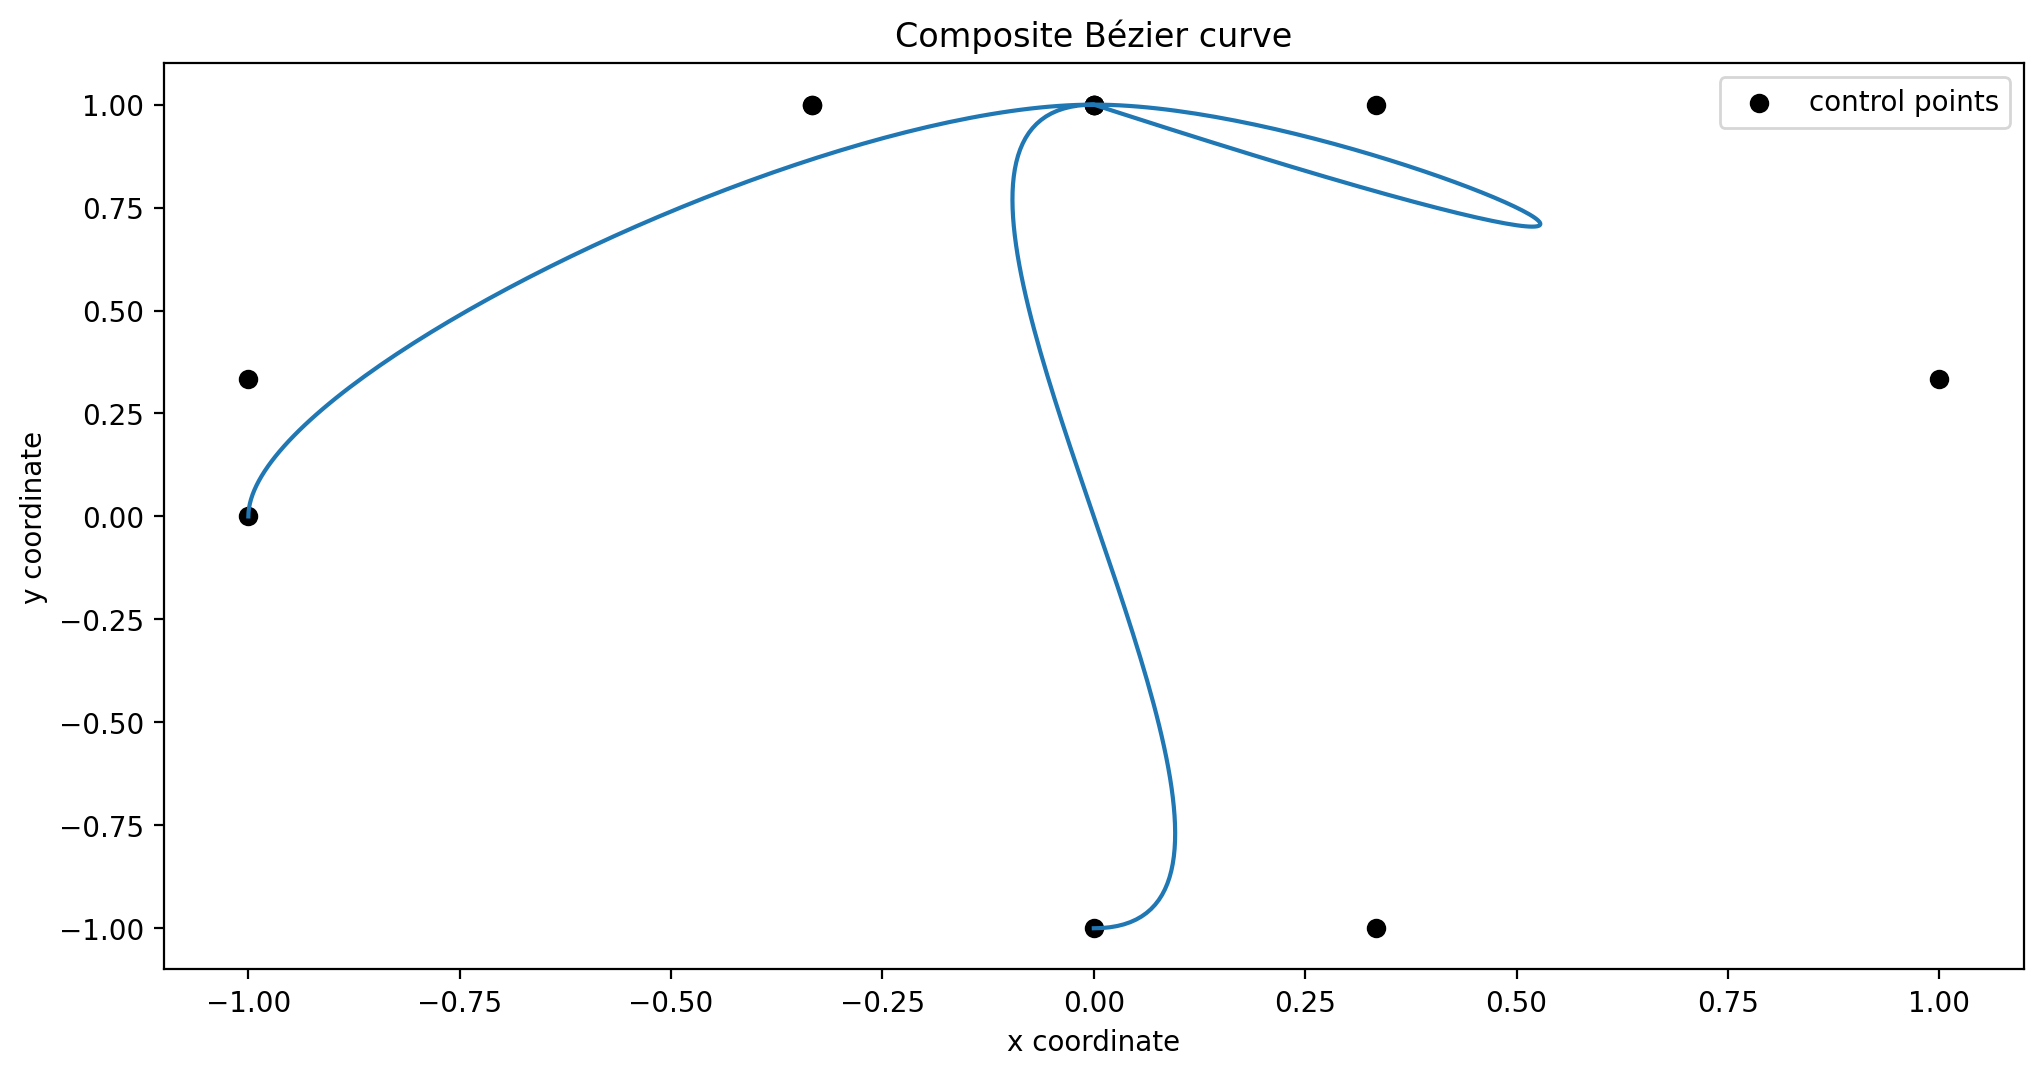

In [4]:
'''Solution 3.1'''

def compositeBezier(P,tsize = 100):
    '''compositeBezier(P,tsize)
    calculates the composite Beziercurve given control matrix P
    
    input:
    P: controll matrix , set of controll points which the bezier curve is to be evauleted from
    tsize: number of parematrization points, defualt to 100
    
    output:
    B: the composite Bezier curve 
    
    '''
    m = len(P[0]) #Number of segments
    d = len(P[0,0]) #Dimension
    B = np.zeros((d,tsize*m)) #allocate space for composite beziercurve
    for i in range(m):
        B[:,i*tsize:tsize*(i+1)] = Bezier(P[:,i],i,tsize) #Use bezier function to get beziercurve-segments
    return B

#Control matrix

P = np.array([[[-1,0],[0,1],[0,1]],[[-1,1/3],[1/3,1],[-1/3,1]],[[-1/3,1],[1,1/3],[1/3,-1]],[[0,1],[0,1],[0,-1]]])


B = compositeBezier(P) #Get the composite bezier curve
plt.plot(B[0],B[1])
plt.scatter(P[:,:,0],P[:,:,1],color = 'black',label = 'control points')
    
plt.title('Composite Bézier curve') #Make plot look nice
plt.xlabel('x coordinate')
plt.ylabel('y coordinate')
plt.legend()
plt.show()

2. Use the properties derived so far to derive an algorithm for the following problem:
   
   Given data points $\mathbf a_0,\ldots,\mathbf a_{m-1} \in \mathbb R^d$ and velocities $\mathbf v_0, \mathbf v_1, \ldots, \mathbf v_{m-1}, \in \mathbb R^d$.
   
   Find the _periodic composite cubic Bézier curve_ $\mathbf B(t)$ that maps from $[0,m]$ to $\mathbb R^d$ with the following properties
   * $\mathbf B(0) = \mathbf B(m),$
   * $\mathbf B'(0) = \mathbf B'(m),$
   * $\mathbf B(i) = \mathbf a_i$ for $i=0,\ldots,m-1,$
   * $\mathbf B'(i) = \mathbf v_i$ for $i=0,\ldots,m-1.$

   You can for example first sketch the algorithm or a few ideas in $\LaTeX$.
   
   Then implement a function `interpolate_periodic(A,V)` where `A` is the vector of the interpolation points $[\mathbf a_0,\ldots,\mathbf a_{m-1}]$ and `V` is the vector of the velocities $[\mathbf v_0,\ldots,\mathbf v_{m-1}]$.   
   The function should return a matrix `P` like in the first part to be able to plot the result.

**Solution 3.2**

We want a periodic composite cubic Bézier curve that interpolates the datapoints $\mathbf a_0,...,\mathbf a_{m-1}\in \mathbb R^d$. To get at cubic Bézier curve we need 4 control points. Furthermore since we know that the Bézier holds the value of the end-controlpoints at the endpoints we can use our datapoints as the end-controlpoints. Thus we want segments of Bézier curves at form 
$$
\mathbf b_i(t;\mathbf a_i,\mathbf b_{i}, \mathbf c_{i}, \mathbf a_{i+1}), \quad t\in [i,i+1)\quad i = 0,1,..., m-1.
$$
With at $i = m$
$$
\mathbf b_m(t;\mathbf a_{m-1},\mathbf b_{m}, \mathbf c_{m}, \mathbf a_{0})
$$
such that 
$$
\mathbf B(t) = \mathbf b_i(t;\mathbf a_i,\mathbf b_{i}, \mathbf c_{i}, \mathbf a_{i+1}), \quad t\in [0,m].
$$
Then we have that $\mathbf B(i) = \mathbf a_i$ and $\mathbf B(m) = \mathbf b_m(m;\mathbf a_{m-1},\mathbf b_{m}, \mathbf c_{m}, \mathbf a_{0}) = \mathbf a_0 = \mathbf B(0)$. Thus $\mathbf B(t)$ interpolates the data set $ \mathbf a_0,...,\mathbf a_{m-1}$ and is periodic.
The problem is then to find $\mathbf b_i$ and $\mathbf c_i$. We want that  $\mathbf B'(i) = \mathbf v_i$ for $i=0,\ldots,m-1.$ This is the same as stating that $\mathbf b_i'(i;\mathbf a_i,\mathbf b_{i}, \mathbf c_{i}, \mathbf a_{i+1}) = \mathbf v_i$. We know from problem 2.3 that at the startpoint, the derivative of the curve holds the value $\mathbf b_i'(i;\mathbf a_i,\mathbf b_{i}, \mathbf c_{i}, \mathbf a_{i+1}) = 3(\mathbf b_i -\mathbf a_i)$. Which gives that 
$$
\mathbf b_i = \frac13\mathbf v_i + \mathbf a_i.
$$
Furthermore we want continuity between the derivatives of the segments, meaning that
$$
\mathbf b_i'(i+1;\mathbf a_i,\mathbf b_{i}, \mathbf c_{i}, \mathbf a_{i+1}) = \mathbf b_{i+1}'(i;\mathbf a_{i+1},\mathbf b_{i+1}, \mathbf c_{i+1}, \mathbf a_{i+2}) = \mathbf v_{i+1}.
$$
Again we use the properties from problem 2.3 and get that
$$
\mathbf b_i'(i+1;\mathbf a_i,\mathbf b_{i}, \mathbf c_{i}, \mathbf a_{i+1}) = 3(\mathbf a_{i+1} - \mathbf c_i) = \mathbf v_{i+1}
$$
which gives 
$$
\mathbf c_i = \mathbf a_{i+1} - \frac13 \mathbf v_{i+1}.
$$
Thus we only need to break our dataset into segements as $(\mathbf a_i, \frac13\mathbf v_i + \mathbf a_i, \mathbf a_{i+1} - \frac13 \mathbf v_{i+1}, \mathbf a_{i+1})$ and then apply our composite Bézier method on this set of points. 

In [5]:
def interpolate_periodic(A,V):
    '''
    interpolate_periodic(A,V)
    Interpolates a dataset A through a periodic cubic composite Bézier curve,
    the bezier curve's derivative interpolates the data set V.
    Does this by finding the correct controll-matrix
    
    input:
    A: array with points on form [a_0, a_1,...]
    V: array with velocities on form [v_0, v_1,...]
    
    output:
    P: the control point matrix
    
    '''
    m = len(A)
    P = np.zeros((4,m,2)) #our control point matrix
    for i in range(m-1):
        P[:,i] = np.array([ A[i], 1/3 * V[i] + A[i], A[i+1] - 1/3 * V[i+1], A[i+1] ]) #Add four and four control points into the matrix
        
    P[:,-1] = np.array([A[-1], 1/3 * V[-1] + A[-1], A[0] - 1/3 * V[0], A[0]]) #Add the last segment, which makes the function periodic
    
    return P 



3. Take your favourite letter from the alphabet. Draw its outline – 
i.e. a closed curve surrounding the letter– on a graph paper (those with a regular 2D grid) and take a few measurements of points and velocities. Use this data to illustrate how your function from 2 works. 

   _Hint_: a good idea is to take a letter without holes that only consist of one component like `t` or `T` (maybe not the little boring `l`).
    
   _Bonus Task_: Ignore the hint and do something fancy with `å`, `æ`, `ø`, or even `ß` (though that can be done with one outline in most this fonts).

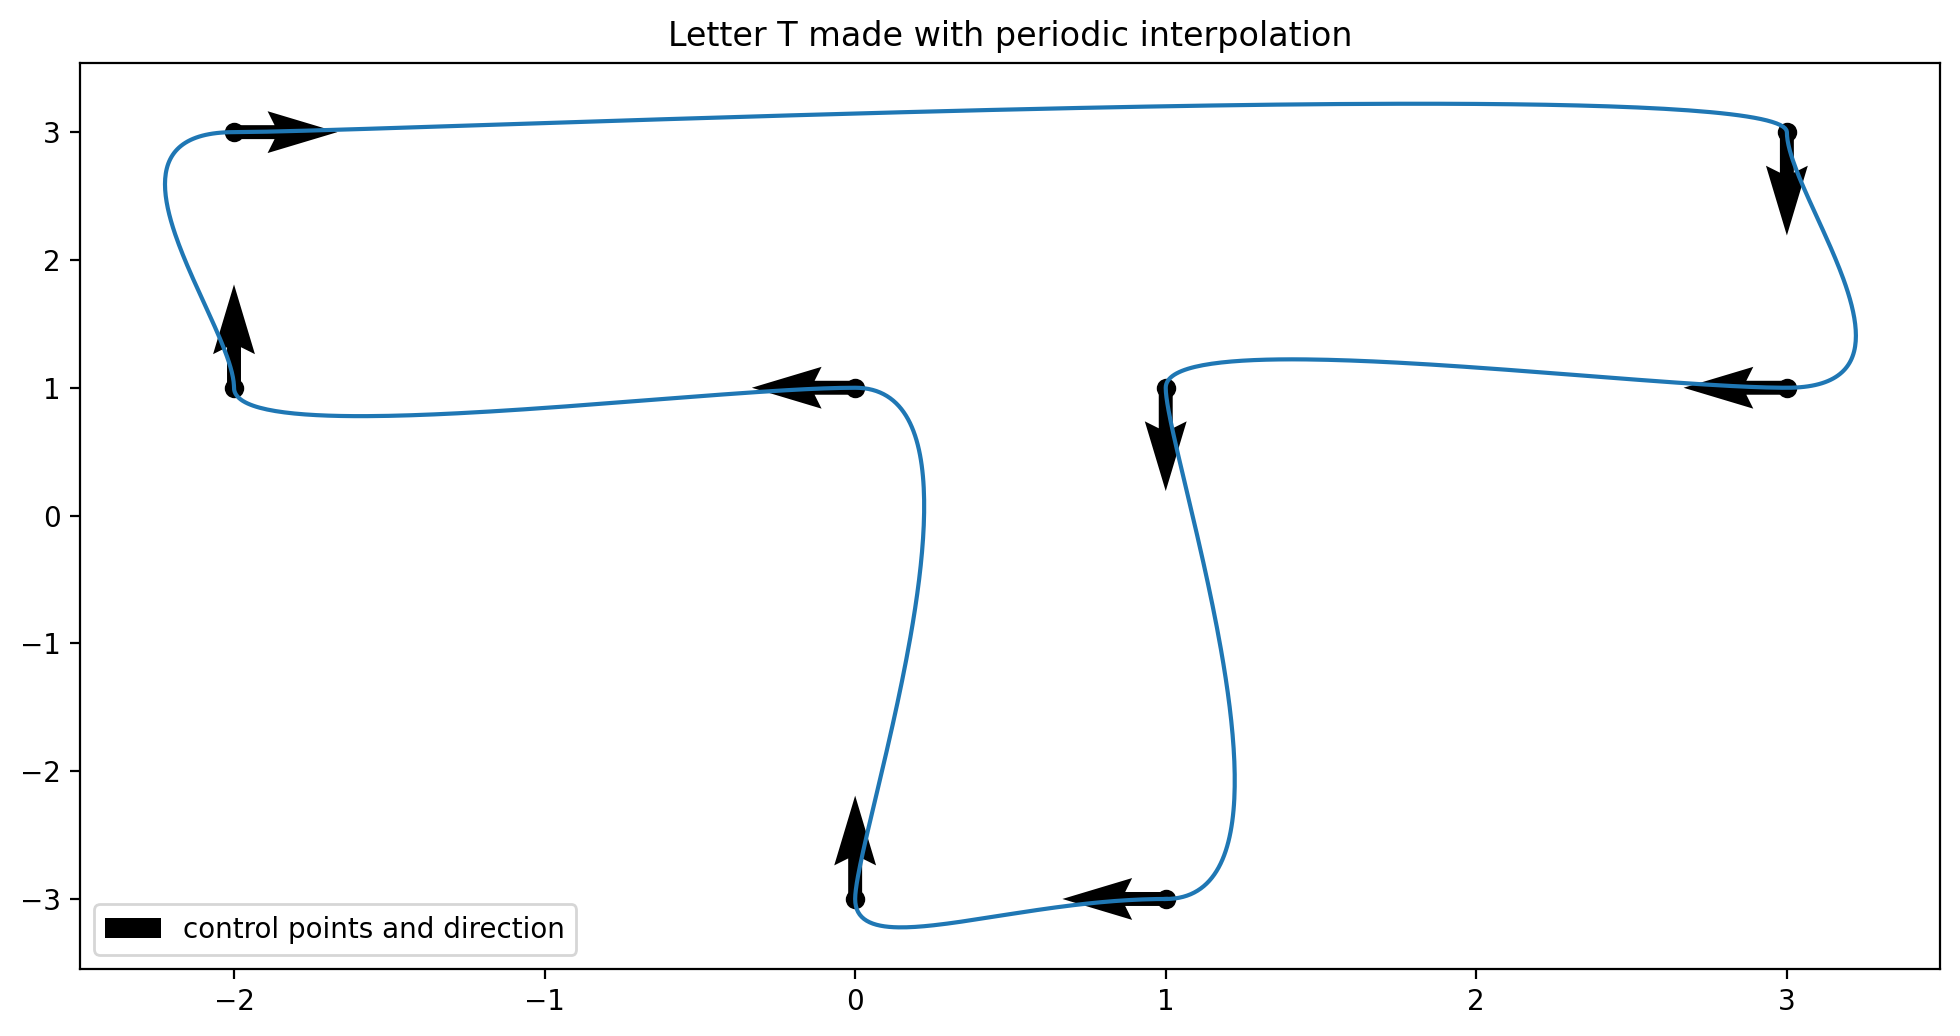

In [36]:
'''Solution 3.3'''
s = 1 #the "speed", controls the "curvyness" of the curve
A = np.array([[1,-3],[0,-3],[0,1],[-2,1],[-2,3],[3,3],[3,1],[1,1]]) #Dataset, forms a T
V = np.array([[-s,0],[0,s],[-s,0],[0,s],[s,0],[0,-s],[-s,0],[0,-s]]) #Velocity set


P = interpolate_periodic(A,V) #Interpolate dataset
B = compositeBezier(P)

plt.plot(B[0],B[1]) #plot the composite beziercurve and the datapoints
plt.scatter(A[:,0],A[:,1], color = 'black')
plt.quiver(A[:,0], A[:,1], V[:,0], V[:,1],label = 'control points and direction')
plt.legend()
plt.title('Letter T made with periodic interpolation')
plt.show()

4. Take the resulting control points from part 3 of this problem and create the following new curves with new sets of points given by
   1. `Q` where each $\mathbf q_{i,j} = 2\mathbf p_{i,j}$
   2. `R` where each $\mathbf r_{i,j} = \begin{pmatrix} \cos\frac{\pi}{4} & -\sin\frac{\pi}{4}\\ \sin\frac{\pi}{4} & \cos\frac{\pi}{4}\end{pmatrix}\mathbf p_{i,j}$
   3. `S` where each $\mathbf s_{i,j} = \begin{pmatrix} 1 & \frac{1}{2}\\ 1 & 0\end{pmatrix}\mathbf p_{i,j} + \frac{1}{2}\begin{pmatrix}1\\1\end{pmatrix}$
   4. `T` where each $\mathbf t_{i,j} = \begin{pmatrix} -1 & -\frac{1}{2}\\ 1 & 0\end{pmatrix}\mathbf p_{i,j} + \frac{1}{2}\begin{pmatrix}1\\-1\end{pmatrix}$
   where each $i=0,1,2,3$ and $j=0,\ldots,m-1$

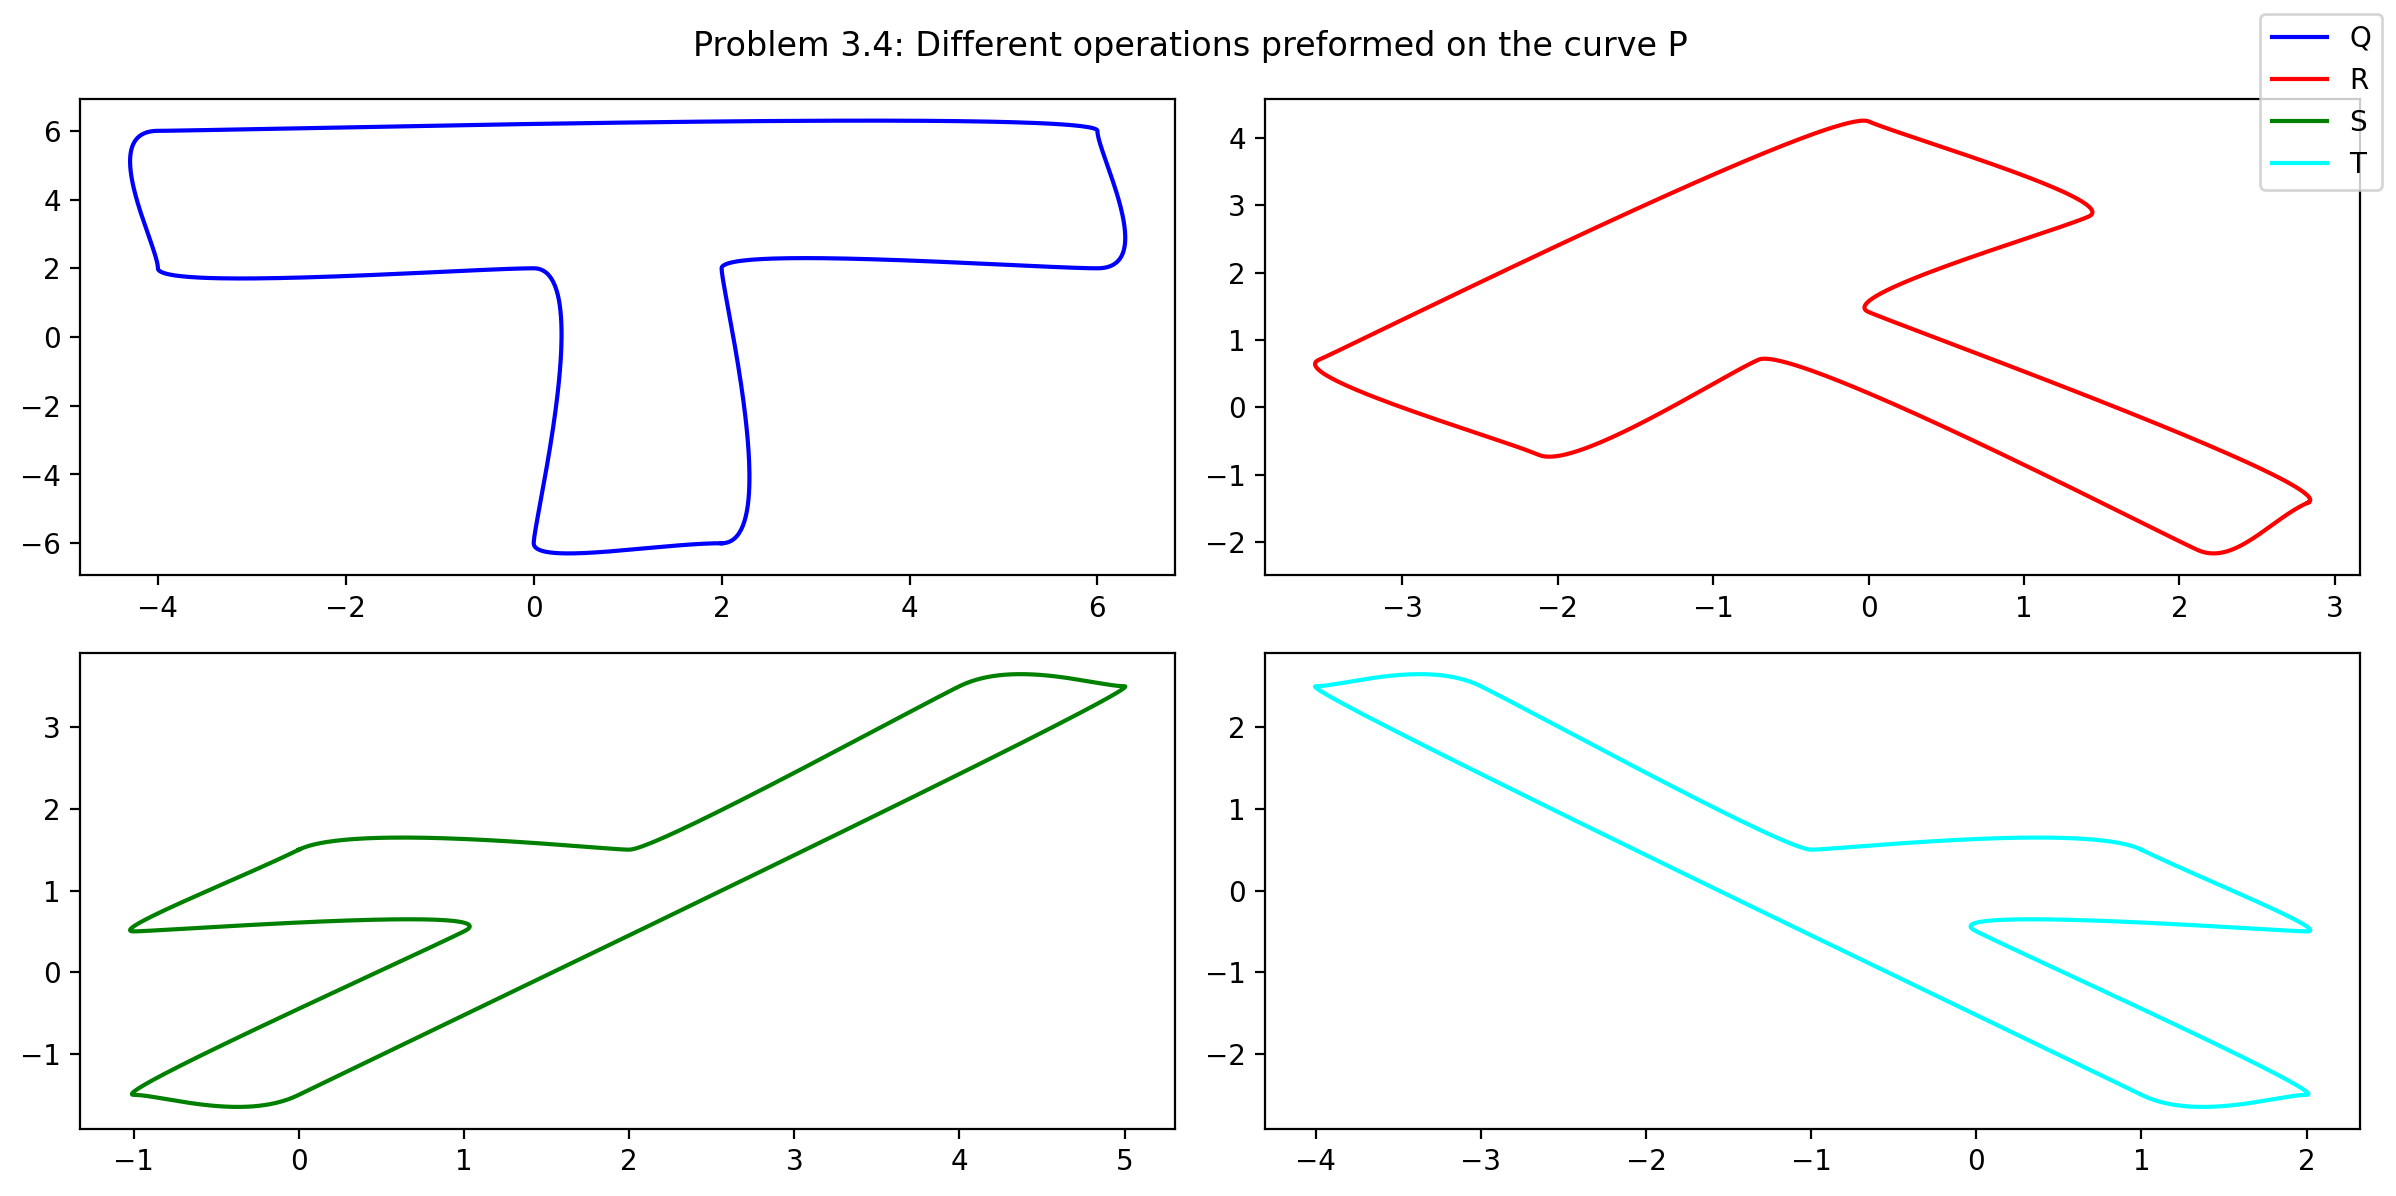

In [28]:
'''Solution 3.4'''
Q = 2 * P.copy() #Find the new sets after the task description
R = P.copy()
S = P.copy()
T = P.copy()
for i in range(len(P)):
    for j in range(len(P[i])):
        R[i,j] = np.array([[np.cos(np.pi/4),-np.sin(np.pi/4)],[np.sin(np.pi/4),np.cos(np.pi/4)]])@P[i,j]
        S[i,j] = np.array([[1,1/2],[1,0]]) @ P[i,j] + np.array([1/2,1/2])
        T[i,j] = np.array([[-1,-1/2],[1,0]]) @P[i,j] + np.array([1/2,-1/2])


BQ = compositeBezier(Q) #Use compositeBezier on the new sets
BR = compositeBezier(R)
BS = compositeBezier(S)
BT = compositeBezier(T)

fig,axs = plt.subplots(2,2) #Plot the sets as subplots

axs[0,0].plot(BQ[0],BQ[1], label = 'Q',color = 'blue')
axs[0,1].plot(BR[0],BR[1], label = 'R',color = 'red')
axs[1,0].plot(BS[0],BS[1], label = 'S',color = 'green')
axs[1,1].plot(BT[0],BT[1], label = 'T',color = 'cyan')
fig.legend() #Make plot look nice
fig.suptitle('Problem 3.4: Different operations preformed on the curve P')
fig.tight_layout()
plt.show()




## Problem 4: Optimisation with Bézier curves

Similar to Problem 3, assume we have a composite cubic Bézier curve $\mathbf B(t)$ (here just not necessarily periodic) with $m$ segments, i.e. control points $\mathbf p_{0,1}, \mathbf p_{1,1}, \mathbf p_{2,1}, \mathbf p_{3,1}, \mathbf p_{0,2}, \mathbf p_{1,2},\ldots,\mathbf p_{3,m}$.
We denote its segments by $\mathbf c_i\colon [i-1,i] \to \mathbb R^2$, for  $i=1,\ldots,m$.
Then $\mathbf B(t)$ is defined on $[0,m]$.
Assume further that $\mathbf B(t)$ is $C^{(1)}$.

1. Due to the property of $\mathbf B(t)$ being continuous, we have
   $\mathbf p_{3,i} = \mathbf p_{0,i+1}$ for $i=1,\ldots,m-1$, so we can omit “storing” the redundant data of $\mathbf p_{3,i}.$
   
   Similarly due to the differentiability we can express $\mathbf p_{2,i}$ using $\mathbf p_{0,i+1}$ and $\mathbf p_{1,i+1}$ for each $i=1,\ldots,m-1$. What does this expression look like?
   
   _Bonus question_: The “data” we store for $\mathbf p_{2,i}$ and/or $\mathbf p_{1,{i+1}}$ is just one vector in $\mathbb R^d$. Can we phrase this information in terms of the velocity $\mathbf v_{i+1}$ at $\mathbf p_{0,i+1}$, i.e. such that from this velocity we can recover both “neighboring” points?

**Solution**

In this problem we can set $ n = 3$. Then $\mathbf p_{2,i} = \mathbf p_{n-1,i}$. If we demand continous differentiable Bézier curve, then we know from problem 2.3 that $\mathbf p_{n-1,i} = 2\mathbf p_{0,i+1} - \mathbf p_{1,i+1}$. Thus we can set

$$
\mathbf p_{2,i} = 2\mathbf p_{0,i+1} - \mathbf p_{1,i+1}.
$$
If the velocity at segment $i+1$ is 
$$
\mathbf v_{i+1} = \mathbf c_{i+1}'(0) = 3(\mathbf p_{1,i+1} - \mathbf p_{0,i+1})
$$
then we can write $\mathbf p_{1,i+1} = \frac13 \mathbf v_{i+1} + \mathbf p_{0,i+1}$ so that
$$
\mathbf p_{2,i} = \mathbf p_{0,i+1}-\frac13 \mathbf v_{i+1}.
$$
Which is essentially what we found in problem 3.2.


2. We want to minimize the (squared) acceleration of the curve
   $$
   F(\mathbf P)
   =
   \int_{0}^{m} \lVert \mathbf B''(t) \rVert^2 \mathrm{d}t
   ,\qquad\text{for some}\quad\lambda > 0
   $$
   with respect to the remaining control points
   $$
   \mathbf P= [\mathbf p_{0,1}, \mathbf p_{1,1}, \mathbf p_{0,2}, \mathbf p_{1,2}, \ldots, \mathbf p_{0,m-1}, \mathbf p_{1,m-1} \mathbf p_{0,m}, \mathbf p_{1,m}, \mathbf p_{2,m}, \mathbf p_{3,m}, ].
   $$

   For simplicity we only consider one segment, i.e. for $\mathbf q_0,\mathbf q_1, \mathbf q_2, \mathbf q_3 \in \mathbb R^2$, we consider the cubic Bézier curve $\mathbf b_3(t; \mathbf q_0, \mathbf q_1, \mathbf q_2, \mathbf q_3)$.
   
   First derive a closed form for the integral
   
   $$
   \int_0^1 \lVert \mathbf b''_3(t; \mathbf q_0, \mathbf q_1, \mathbf q_2, \mathbf q_3) \rVert_2^2\ \mathrm{d} t
   $$
   
   in order to derive the gradient of 
   $$
   \tilde F (\mathbf q_0, \mathbf q_1, \mathbf q_2, \mathbf q_3) = \int_0^1 \lVert \mathbf b''_3(t; \mathbf q_0, \mathbf q_1, \mathbf q_2, \mathbf q_3)\rVert_2^2 \ \mathrm{d} t
   $$
   and with respect to the control points $\mathbf q_i, i=0,\ldots,3$.
   
   While we do not want to write down the whole gradient of $F$, please sketch how you can use the result of $\tilde F$ to compute the gradient of $F$. Remember that $\mathbf B(t)$ is continuously differentiable.

**Solution**


Knows that the second derivative of a Bézier curve $\mathbf c(t)$ is
$$
\mathbf c''(t) = n(n-1)\sum_{i=0}^{n}\mathbf p_i\left(B_{i-2,n-2}(t) + B_{i,n-2}(t) - 2B_{i-1,n-2}(t)\right).
$$
Which in our case becomes 
$$
\mathbf b_3''(t;\mathbf q_0, \mathbf q_1, \mathbf q_2, \mathbf q_3) = 6\sum_{i=0}^{3}\mathbf q_i\left(B_{i-2,1}(t) + B_{i,1}(t) - 2B_{i-1,1}(t)\right) 
$$
$$
= 6\left(\mathbf q_0B_{0,1}(t) + \mathbf q_1\left(B_{1,1}(t) - 2B_{0,1}(t)\right)+\mathbf q_2\left(B_{0,1}(t) - 2B_{1,1}(t)\right) + \mathbf q_3B_{1,1}(t)\right)
$$
$$
= 6\left(B_{0,1}(t)\left(\mathbf q_0 - 2\mathbf q_1 + \mathbf q_2\right) + B_{1,1}(t)\left(\mathbf q_1 - 2\mathbf q_2 + \mathbf q_3\right)\right) = (1-t)\mathbf b_3''(0) + t\mathbf b_3''(1).
$$

Where we have sat $\mathbf b_3''(t;\mathbf q_0, \mathbf q_1, \mathbf q_2, \mathbf q_3) = \mathbf b_3''(t)$ for simplicity. We can then write $\tilde F(\mathbf q_0, \mathbf q_1, \mathbf q_2, \mathbf q_3)$ as

$$
\tilde F(\mathbf q_0, \mathbf q_1, \mathbf q_2, \mathbf q_3) = \int_{0}^1\|(1-t)\mathbf b_3''(0) + t\mathbf b_3''(1)\|^2_2 dt = \int_0^1\sum_{i = 1}^2\Big((1-t)\mathbf b_3''(0)_i + t\mathbf b_3''(1)_i\Big)^2 dt
$$
$$
= \sum_{i= 1}^2\int_0^1(1-t)^2(\mathbf b_3''(0)_i)^2 + 2(1-t)t\mathbf b_3''(0)_i\mathbf b_3''(1)_i + t^2(\mathbf b_3''(1)_i)^2 dt
$$
$$
= \frac13 \sum_{i = 1}^2\left((\mathbf b_3''(0)_i)^2 + \mathbf b_3''(0)_i \mathbf b_3''(1)_i + (\mathbf b_3''(1)_i)^2\right) = \frac13 \sum_{i = 1}^2\left((\mathbf b_3''(0)_i + \mathbf b_3''(1)_i)^2 - \mathbf b_3''(0)_i\mathbf b_3''(1)_i\right)
$$
$$
= \frac13\left(\|\mathbf b_3''(0) + \mathbf b_3''(1)\|_2^2 - \mathbf b_3''(0)^T\mathbf b_3''(1)\right).
$$

We can express this in terms of the coordinates $\mathbf q_0, \mathbf q_1, \mathbf q_2, \mathbf q_3$.

$$
\tilde F(\mathbf q_0, \mathbf q_1, \mathbf q_2, \mathbf q_3)  = 6^2\frac13\left(\|\mathbf q_0 - \mathbf q_1 - \mathbf q_2 + \mathbf q_3\|_2^2 - (\mathbf q_0^T - 2\mathbf q_1^T + \mathbf q_2^T)(\mathbf q_1 - 2\mathbf q_2 + \mathbf q_3)\right).
$$
We look at the terms individually.
$$
(\mathbf q_0^T - 2\mathbf q_1^T + \mathbf q_2^T)(\mathbf q_1 - 2\mathbf q_2 + \mathbf q_3)
$$
$$
= \mathbf q_0^T\mathbf q_1 - 2\mathbf q_0^T\mathbf q_2 + \mathbf q_0^T\mathbf q_3 - 2\mathbf q_1^T\mathbf q_1 + 5 \mathbf q_1^T\mathbf q_2 - 2\mathbf q_1^T\mathbf q_3 - 2\mathbf q_2^T\mathbf q_2 + \mathbf q_2^T\mathbf q_3.
$$

$$
\|\mathbf q_0 - \mathbf q_1 - \mathbf q_2 + \mathbf q_3\|_2^2 = \left(\mathbf q_0 - \mathbf q_1 - \mathbf q_2 + \mathbf q_3\right)^T\left(\mathbf q_0 - \mathbf q_1 - \mathbf q_2 + \mathbf q_3\right)
$$
$$
= \mathbf q_0^T\mathbf q_0 + \mathbf q_1^T\mathbf q_1 + \mathbf q_2^T\mathbf q_2 + \mathbf q_3^T\mathbf q_3 - 2\mathbf q_0^T\mathbf q_1 - 2\mathbf q_0^T\mathbf q_2 + \mathbf q_0^T\mathbf q_3 + 2\mathbf q_1^T\mathbf q_2 - 2 \mathbf q_1^T\mathbf q_3 - 2\mathbf q_2^T\mathbf q_3.
$$

Where we have used that $\mathbf q_i^T\mathbf q_j = \mathbf q_j^T\mathbf q_i$ for vectors $\mathbf q_i, \mathbf q_j$ in $ \mathbb R^d $.
We now put these terms together and get that 
$$
\tilde F(\mathbf q_0, \mathbf q_1, \mathbf q_2, \mathbf q_3) =12\left( \mathbf q_0^T\mathbf q_0 + 3\mathbf q_1^T\mathbf q_1 + 3\mathbf q_2^T\mathbf q_2 + \mathbf q_3^T\mathbf q_3 - 3\mathbf q_0^T\mathbf q_1 + \mathbf q_0^T\mathbf q_3 - 3\mathbf q_1^T\mathbf q_2 - 3\mathbf q_2^T\mathbf q_3\right).
$$

Now we can take the gradient of $\tilde F(\mathbf q_0, \mathbf q_1, \mathbf q_2, \mathbf q_3)$ with respect to $\mathbf q_0, \mathbf q_1, \mathbf q_2, \mathbf q_3$.

$$
\nabla\tilde F(\mathbf q_0, \mathbf q_1, \mathbf q_2, \mathbf q_3) = 12
\begin{pmatrix}
2\mathbf q_0 - 3\mathbf q_1 + \mathbf q_3 \\
6\mathbf q_1 - 3\mathbf q_0 - 3\mathbf q_2 \\
6\mathbf q_2 - 3\mathbf q_1 - 3\mathbf q_3 \\
2 \mathbf q_3 + \mathbf q_0 - 3\mathbf q_2
\end{pmatrix} \in \mathbb R^8
$$

We are now capable of expressing the gradient of $F$.
Since the curve is composite, when can disolve the integral into a sum. If we let $\mathbf P_i = (\mathbf p_{0,i}, \mathbf p_{1,i}, \mathbf p_{2,i}, \mathbf p_{3,i})$ we can write
$$
\nabla F(\mathbf P) = \nabla \sum_{i = 1}^m \tilde F(\mathbf P_i) 
$$
$$
= 12\nabla\Biggl( \sum_{i = 1}^{m} \left( \mathbf p_{0,i}^T\mathbf p_{0,i} + 3\mathbf p_{1,i}^T\mathbf p_{1,i} + 3\mathbf p_{2,i}^T\mathbf p_{2,i} + \mathbf p_{3,i}^T\mathbf p_{3,i} - 3\mathbf p_{0,i}^T\mathbf p_{1,i} + \mathbf p_{0,i}^T\mathbf p_{3,i} - 3\mathbf p_{1,i}^T\mathbf p_{2,i} - 3\mathbf p_{2,i}^T\mathbf p_{3,i}\right)\Biggr)
$$

If we now use that $\mathbf p_{3,i} = \mathbf p_{0,i+1}$ and that $\mathbf p_{2,i} = 2\mathbf p_{0,i+1} - \mathbf p_{1,i+1}$ due to continuity and continuity in the first derivative, we can express $\tilde F(\mathbf P)$ as
$$
\tilde F(\mathbf P_i) = \mathbf p_{0,i}^Tp_{0,i} + 3\mathbf p_{1,i}^T\mathbf p_{1,i} + 12\mathbf p_{0,i+1}^T\mathbf p_{0,i+1} - 12 \mathbf p_{0,i+1}^Tp_{1,i+1} + 3 \mathbf p_{1,i+1}^Tp_{1,i+1} + \mathbf p_{0,i+1}^Tp_{0,i+1} - 3\mathbf p_{0,i}^T\mathbf p_{1,i} + \mathbf p_{0,i}^T\mathbf p_{0,i+1} - 6 \mathbf p_{1,i}^T\mathbf p_{0,i+1} + 3\mathbf p_{1,i}^T\mathbf p_{1,i+1} - 6 \mathbf p_{0,i+1}^T\mathbf p_{0,i+1} + 3\mathbf p_{0,i+1}^Tp_{1,i+1}.
$$
We can therefore express $\nabla F$ as an expression of three sums, one for the terms consisting only $i$ one for those who consists only $i+1$ and one for both. We will also get a tail of the last segments that are not coverd by the reduction.
$$
\nabla F(\mathbf P) =12 \nabla \Bigg( \sum_{i = 1}^m \Bigl(\mathbf p_{0,i}^T\mathbf p_{0,i} + 3\mathbf p_{1,i}^T\mathbf p_{1,i} - 3\mathbf p_{0,i}^Tp_{1,i}\Bigr) + \sum_{i = 1}^{m-1} \Bigl(\mathbf p_{0,i}^Tp_{0,i+1} - 6 \mathbf p_{1,i}^Tp_{0,i+1} + 3\mathbf p_{1,i}^T\mathbf p_{1,i+1}\Bigr) + \sum_{i = 1}^{m-1} \Bigl(7\mathbf p_{0,i+1}^T\mathbf p_{0,i+1} - 9 \mathbf p_{0,i+1}^T\mathbf p_{1,i+1} + 3\mathbf p_{1,i+1}^T\mathbf p_{1,i+1}\Bigr) + \mathbf p_{3,m}^T\mathbf p_{3,m} + \mathbf p_{2,m}^T\mathbf p_{2,m} + \mathbf p_{0,m}^T\mathbf p_{3,m} - 3\mathbf p_{1,m}^T\mathbf p_{2,m} - 3\mathbf p_{2,m}^T\mathbf p_{3,m}\Bigg)
$$
Which is an expression consisting of $m$ $\mathbf p_{0,i}$, $m$ $\mathbf p_{1,i}$, one $\mathbf p_{2,m}$ and one $\mathbf p_{3,m}$, i.e $2m + 2$ diffrent vectors in $\mathbb R^2$. Therefore we expect the gradient to be of dimension $4m + 4$.
$$
12\nabla\Biggl(\mathbf p_{0,1}^T\mathbf p_{0,1} + 3\mathbf p_{1,1}^T\mathbf p_{1,1} - 3\mathbf p_{0,1}^T\mathbf p_{1,1} + 3\mathbf p_{2,m}^T\mathbf p_{2,m} + \mathbf p_{3,m}^T\mathbf p_{3,m} + \mathbf p_{0,m}^T\mathbf p_{3,m} - 3\mathbf p_{1,m}^T\mathbf p_{2,m}
+\sum_{i = 2}^{m} \left( 7\mathbf p_{0,i}^T\mathbf p_{0,i} + 6\mathbf p_{1,i}^T\mathbf p_{1,i} -12\mathbf p_{0,i}^T\mathbf p_{1,i} + \mathbf p_{0,i-1}^T\mathbf p_{0,i} + 3\mathbf p_{1,i-1}^T\mathbf p_{1,i-1} - 6\mathbf p_{1,i-1}^T\mathbf p_{0,i}\right)\Biggr).
$$
$$
= 12\begin{pmatrix}
2\mathbf p_{0,1} - 3\mathbf p_{1,1} + \mathbf p_{0,2} \\
6 \mathbf p_{1,1} - 3\mathbf p_{0,1} - 6 \mathbf p_{0,2} \\
\vdots \\
14\mathbf p_{0,i} - 12 \mathbf p_{1,i} + \mathbf p_{0,i-1} - 6 \mathbf p_{1,i-1} \\
12\mathbf p_{1,i} - 12 \mathbf p_{0,i} \\
\vdots \\
\mathbf p_{3,m} + 14 \mathbf p_{0,m} - 12 \mathbf p_{1,m} + \mathbf p_{0,m-1} - 6\mathbf p_{1,m-1} \\
-3 \mathbf p_{2,m} + 12 \mathbf p_{1,m} - 12 \mathbf p_{0,m} \\
6\mathbf p_{2,m} - 3\mathbf p_{1,m} \\
2\mathbf p_{3,m} +\mathbf p_{0,m}
\end{pmatrix}
$$

Which is an expression consisting of $m$ $\mathbf p_{0,i}$, $m$ $\mathbf p_{1,i}$, one $\mathbf p_{2,m}$ and one $\mathbf p_{3,m}$, i.e $2m + 2$ diffrent vectors in $\mathbb R^2$. Therefore we expect the gradient to be of dimension $4m + 4$.

3. Look at the first order optimality conditions of the optimisation task to minimize $\tilde F$ from the last part.
   How can we find such a minimiser?
   Is the solution unique?
   
   For the overall problem $F$ we even have to take into account the properties from the fist part. What about the solution now? Is it unique? You may argue intuitively here or provide a concrete example of two minimisers for a 2-segment curve, i.e. $m=2$.

* We find the minimiser of $\tilde F$ by solving $\nabla \tilde F = \mathbf 0$, i.e
$$
\nabla\tilde F(\mathbf q_0, \mathbf q_1, \mathbf q_2, \mathbf q_3) = 12
\begin{pmatrix}
2\mathbf q_0 - 3\mathbf q_1 + \mathbf q_3 \\
6\mathbf q_1 - 3\mathbf q_0 - 3\mathbf q_2 \\
6\mathbf q_2 - 3\mathbf q_1 - 3\mathbf q_3 \\
2 \mathbf q_3 + \mathbf q_0 - 3\mathbf q_2
\end{pmatrix} = \mathbf 0.
$$
Which then is a system with eight linear equations and $4 \cdot 2 = 8$ unknowns, we can then express the system by a matrix $\tilde A$.
$$
\tilde A = 12 
\begin{pmatrix}
2 & -3 & 0 & 1 \\
-3 & 6 & -3 & 0 \\
0 & -3 & 6 & -3 \\
1 & 0 & -3 & 2
\end{pmatrix}
$$
wich has determinant $\det{\tilde A} = 0$, thus, since this is a homgenous system there is infintintely many solutions, so there is no unique solution to this system.


* For the general system we look at $\nabla F = 0$, which will give a system matrix with dimension $4m+4 \times 4m+4$, which is generally not fun to calculate the determinant of. But if we now go back and pretend that we don't know that $\mathbf p_{3,i} = \mathbf p_{0,i+1}$ and that $\mathbf p_{2,i} = 2\mathbf p_{0,i+1} - \mathbf p_{1,i+1}$. Then the gradient of $F$ is 
$$
\nabla F(\mathbf P) = \nabla \sum_{i = 1}^m \tilde F(\mathbf P_i),
$$
and we know that for $j \neq i$ 
$$
\frac{\partial}{\partial \mathbf P_j} \tilde F(\mathbf P_i) = 0
$$
and for $i = j$ 
$$
\frac{\partial}{\partial \mathbf P_i} \tilde F(\mathbf P_i) = \nabla \tilde F(\mathbf P_i).
$$
And if we further think of the gradient as a linear operator, then it's representation for $\tilde F$ would be $\tilde A$ . We try to do the same for the general case of $F$, we want the gradient of $F$ to be represented by some matrix $A$. We know that when we take the partial derivative of $F$ it with respect to $\mathbf P_j$ it is only the term of $\tilde F(\mathbf P_j)$ that contributes. Meaning that for the system $\nabla F = 0$ we can express the system matrix $A$ in terms of $\tilde A$;
$$
A = 
\begin{pmatrix}
\tilde A & \mathbf 0 &\mathbf 0 &\dots & \mathbf 0 \\
\mathbf 0 & \tilde A & \mathbf 0 & \dots& \mathbf 0\\
\mathbf 0 & \mathbf 0 & \tilde A & \dots & \mathbf 0 \\
\vdots & \vdots & \vdots & \ddots & \vdots \\
\mathbf 0 & \mathbf 0 & \mathbf 0 &\dots & \tilde A
\end{pmatrix}
$$
This is a diagonal block matrix which can be written as the matrix product 
$$
\prod_{i = 1}^{m}{
\begin{pmatrix}
I \\
& I \\
& & \ddots \\
& & & \tilde A \\
& & & & I \\
& & & &  & \ddots \\
& & & &  & & I
\end{pmatrix}}
$$
Where each element will have the determinant
$$
\begin{vmatrix}
I \\
& I \\
& & \ddots \\
& & & \tilde A \\
& & & & I \\
& & & &  & \ddots \\
& & & &  & & I
\end{vmatrix}
 = \det \tilde A
$$
Which gives that the determinant of $A$ is
$$
\det{A} = \prod_{i = 1}^m \det{\tilde A} = 0.
$$ 
So for the general problem $\nabla F = 0$ we have infinitely many solutions, i.e not uniqueness of solutions. As for the case where we demand continuity and differentiable continutity the same conclusion makes sense, since when applying the conditions we reduce the system from $8m$ unknowns to $4m+ 4$ unknowns. So we get more equations than unknown, and thus we are dealing with a system with no unique solutions.

4. Assume we extend the problem to have some (data) points $\mathbf d_i \in \mathbb R^2$, $i=0,\ldots,m$ given and we extend the problem to
   $$
   G_\lambda(\mathbf P)
   =
   \frac{\lambda}{2}\sum_{i=0}^{m} \lVert \mathbf d_i - \mathbf B(i) \rVert_2^2 + \int_{0}^{m} \lVert   \mathbf B''(t) \rVert^2 \mathrm{d}t
   ,\qquad\text{for some}\quad\lambda > 0
   $$
   
   We again can first look at the simplified problem: Given two points $\mathbf s, \mathbf e \in \mathbb R^2$ consider for some $\lambda > 0$ the function for one segment, namely
   
   $$
   \begin{split}
   \tilde G_\lambda(\mathbf q_0, \mathbf q_1, \mathbf q_2, \mathbf q_3) &= \frac{\lambda}{2}\Bigl( \lVert \mathbf s - \mathbf b_3(0; \mathbf q_0, \mathbf q_1, \mathbf q_2, \mathbf q_3) \rVert_2^2 + \lVert \mathbf e - \mathbf b_3(1; \mathbf q_0, \mathbf q_1, \mathbf q_2, \mathbf q_3) \rVert_2^2\Bigr) + \tilde F (\mathbf q_0, \mathbf q_1, \mathbf q_2, \mathbf q_3)\\
   &=
   \frac{\lambda}{2}\Bigl( \lVert \mathbf s - \mathbf q_0 \rVert_2^2 + \lVert \mathbf e - \mathbf q_3 \rVert_2^2\Bigr) + \tilde F (\mathbf q_0, \mathbf q_1, \mathbf q_2, \mathbf q_3)
   \end{split}
   $$
   
   Does this change the question about uniqueness?
   Without programming / testing, just intuitively:
   What does this model do, if you let $\lambda$ tend to zero? What does it do, if you let $\lambda$ tend to $\infty$?
   
   Similarly to part 3 of this problem, what does change for $G_\lambda$ in comparison to $F$ concerning uniqueness? what does the $\lambda$ change here (if very large or very small)?

**Solution**

* When taking the gradient of $\tilde G_\lambda$ we will still get a vector in $\mathbb R^8$ and the gradient of $ \frac{\lambda}{2}\Bigl( \lVert \mathbf s - \mathbf q_0 \rVert_2^2 + \lVert \mathbf e - \mathbf q_3 \rVert_2^2\Bigr)$ is 
$$
\lambda 
\begin{pmatrix}
\mathbf q_0 - \mathbf s \\
0 \\
0 \\
\mathbf q_3 - \mathbf e
\end{pmatrix}
$$
so that 
$$
\nabla \tilde G_\lambda = 
\begin{pmatrix}
\lambda (\mathbf q_0- \mathbf s) + 12(2\mathbf q_0 - 3\mathbf q_1 + \mathbf q_3) \\
12(6\mathbf q_1 - 3\mathbf q_0 - 3\mathbf q_2) \\
12(6\mathbf q_2 - 3\mathbf q_1 - 3\mathbf q_3) \\
\lambda(\mathbf q_3 - \mathbf e) + 12(2 \mathbf q_3 + \mathbf q_0 - 3\mathbf q_2)
\end{pmatrix} = \mathbf 0.
$$ 
is a nonhmogenous system with system matrix $\tilde B_\lambda$
$$
\tilde B_\lambda = 12
\begin{pmatrix}
\lambda/12 + 2 & -3 & 0 & 1 \\
-3 & 6 & -3 & 0 \\
0 & -3 & 6 & -3 \\
1 & 0 & -3 & \lambda/12 + 2
\end{pmatrix}.
$$
Which has determinant $\det{\tilde B} = 3888\lambda^2$. Meaning that as long as $\lambda >0$  there exists a unique non-trivial solution of the nonhomogenous system.


* If $\lambda$ tend to zero the datapoint term will become small and $\tilde F$ will dominate $\tilde G_\lambda$. If $\lambda$ tend towards $\infty$ then the datapoint term becommes large and will becomme the dominating factor of $\tilde G_\lambda$. Meaning that $\lambda$ controls wether the squared difference between the datapoints and the controlpoints or the squared acceleration of the curve should dominate. So for the optimisation problem $\nabla \tilde G  = 0$, $\lambda$ controls how close the optimised solution is to the datapoints.

* For the general case with $G_\lambda$ we will not calculate anything, but intuitvly if a segment of the curve has a local extrema then the composite curve should also have a local extrema. Therefore it should exist a unique solution to $\nabla G_\lambda = 0$ given that $\lambda >0$.

* We excpect for the general case, as it was for $\tilde G$, that $\lambda$ controls how close the solution will be to the datapoints. E.g large $\lambda$ results in that the datapoint term dominates such that the problem becomes essentially to find the controlpoints which is closest to the datapoints and a small $\lambda$ results in that $F$  dominates such that the solution will be the controlpoints which minimizes the acceleration, aka a straight line. So in total will this model try to make a curve with little acceleration, i.e small curvature, and that is close to the datapoints.

5. Use the previous parts to derive a gradient descent algorithm to minimize $G_\lambda(\mathbf P)$ with respect to the control points $\mathbf P$. You may use a constant step size.

   Take as an example your letter from Problem 3 as input $\mathbf P$ for your algorithm and two different values of $\lambda$. How does the letter change?

**Solution**

The general scheme for a gradient-descent method with constant step size $h$ is
$$
\mathbf x_{i,n+1} = x_{i, n} - h\nabla T(\mathbf x_{i,n})
$$
so that we always moves in the steepest direction. We choose to look at one segment at the time, since intuitvly it makes sense that if each of the segments are optimised then the whole composite curve will be optimised. So in our case $T = \tilde G_\lambda $ and $\mathbf x_i = P_i$. 

We know that because of continutity and differentiable continutity between the segments we have that $P_{3,i} = P_{0,i+1}$ and that $P_{2,i} = 2P_{0,i+1} - P_{1,i+1}$. However we think it is easier to implement a method rewriting this to $P_{0,i} = P_{3,i-1}$ and $P_{1,i} = 2P_{3,i-1} - P_{2,i-1}$. Meaning that if we already have solved for the previous segment $P_{i-1}$, then we can set $\mathbf x_{0,i,n} = P_{3,i-1},\text{ } \mathbf x_{1,i,n} = 2P_{3,i-1} - P_{3,i-1}$ for all $n$. So that we only need to bother looking at the two last controll points when we know the previous solution. Our goal is to find points such that $\nabla \tilde G_\lambda = 0$ which is equivalent with saying that $\|\nabla \tilde G_\lambda \|_2 = 0$, so we will use this as our estimate of error. 

In [29]:

def GradGtilde(q, lamb, s, e):
    '''GradGtilde(q, lamb, s, e)
    calculates the gradient of one segment
    
    input:
    q: controllpoints for the given segment, ndarray of dimension (4,2)
    lamb: lambda value, float
    s: a datapoint, ndarray of dimension (1,2)
    e: a datapoint, ndarray of dimension (1,2)
    
    output:
    Gtilde: gradient of segment, ndarray of dimension (4,2)
    
    '''
    #Calculate the gradient as ndarray as described above
    Gtilde = np.array([lamb *(q[0]- s) + 12 * (2* q[0]- 3*q[1] + q[3]),
                    12*(6*q[1] - 3*q[0] - 3*q[2]),
                    12 * (6*q[2] - 3 * q[1] -3*q[3]),
                    lamb*(q[3]- e) + 12 * (2*q[3] + q[0] - 3*q[2])])
    return Gtilde


def GradDescentG(h,s,e, lamb, prev = None, tol = 1e-4, maxiter = 1e4):
    '''GradDescentG(tol, maxiter, h, s, e, lamb, prev)
    finds the minimiser of \tilde G while ensuring that the curve is 
    continous and differentiable at all points
    
    input:
    h:       step-size, float
    s:       a datapoint, ndarray of dimension (1,2)
    e:       a datapoint, ndarray of dimension (1,2)
    lamb:    lambda value, float/int
    prev:    controlpoints of the previous segment, 
             default value of None. If not none, type should be ndarray 
             of dimension (4,2)
             
    tol:     tolerance limit for the error, float, default valye if 1e-4
    maxiter: maximum number of iterations, int/float, defualt value of 1e4
    
    output:
    x :      the optimised controllpoints for this segment, ndarray of 
             dimension (4,2)
    error:   final error estimate
    n:       number of iterations
    
    '''
    x = np.random.rand(4,2) # a random guess, ndarray with values between zero and 1
    #x = np.zeros((4,2))
    if isinstance(prev, type(x)): #if we have a previous solution, only look at the two last controllpoints
        x[0] = prev[3] #set the two first to be the last ones in the previous solution
        x[1] = 2*prev[3] - prev[2]
        gradG =  GradGtilde(x, lamb,s, e)[2:] #find the gradient, but only use the two last coordinate
        error = np.linalg.norm(gradG) #error estimate
        n = 0 #iteration count
        while error > tol and n <= maxiter: # do grad descent untill one of the stop criterias are reached
            x[2:] = x[2:] - h * gradG # gradient descent with constant step size
            gradG =  GradGtilde(x, lamb,s, e)[2:] #new gradient
            error = np.linalg.norm(gradG) #new error
            n += 1 # update iteration count
            
    else: #else if we don't have a previous solution, we do the same as above, only that we consider all 4 controllpoints
        gradG = GradGtilde(x,lamb,s,e)
        error = np.linalg.norm(gradG)
        n = 0
        while error > tol and n <= maxiter:
            x = x - h * gradG
            gradG =  GradGtilde(x, lamb,s, e)
            error = np.linalg.norm(gradG)
            n +=1
    
    return x, error, n #return the solution, the final errorestimate and number of iterations

def findMinP(D, lamb, h = 1e-3):
    '''findMinP(D,lamb, h)
    finds the optimised-controll matrix P
    
    input:
    D:    array/list of datapoints
    lamb: lambda value, float/int
    h:    step-size, float, default value of 1e-3
    
    output:
    P :   optimised controll-matrix
    '''
    m = len(D) # number of datapoints
    P = np.zeros((4, m-1, 2)) #allocate storage for control matrix
    error = np.zeros(m-1)
    niter = np.zeros(m-1)
    P[:,0],error[0], niter[0] = GradDescentG(h, D[0], D[1], lamb) # find the first solution where we do not have a previous solution
    for i in range(1,m -1 ): #iterate through all segments
        
        #Use gradient descent to find optimised controll points for one segment at the time, using the previous solution
        P[:,i],error[i], niter[i] = GradDescentG(h, D[i], D[i+1], lamb,P[:,i-1])
   
    print(f'lambda = {lamb}:\tAverage iterations per segment: {np.average(niter):.2f}\tAverage error per segment: {np.average(error):.2e}\n')
    return P #return control matrix

A = np.array([[1,-3],[0,-3],[0,1],[-2,1],[-2,3],[3,3],[3,1],[1,1],[1,-3]]) #dataset

P1 = findMinP(A, 0.01,0.01) #lambda = 0.01

P2 = findMinP(A, 1, 0.01) #lambda = 1

P3 = findMinP(A, 10,0.01) #lambda = 10

P4 = findMinP(A, 100, 0.01) #lambda = 100

B1 = compositeBezier(P1) #find the compositeBezier curves given the controll-matrices
B2 = compositeBezier(P2)
B3 = compositeBezier(P3)
B4 = compositeBezier(P4)


lambda = 0.01:	Average iterations per segment: 1460.25	Average error per segment: 2.93e-03

lambda = 1:	Average iterations per segment: 456.38	Average error per segment: 9.80e-05

lambda = 10:	Average iterations per segment: 120.50	Average error per segment: 9.44e-05

lambda = 100:	Average iterations per segment: 23.12	Average error per segment: 6.61e-05



We need fewer iterations as $\lambda$ increases. Thus it seems that it is hard to find the right balance between curvature and minimizing the distance to the datapoints when $\lambda$ is small. 

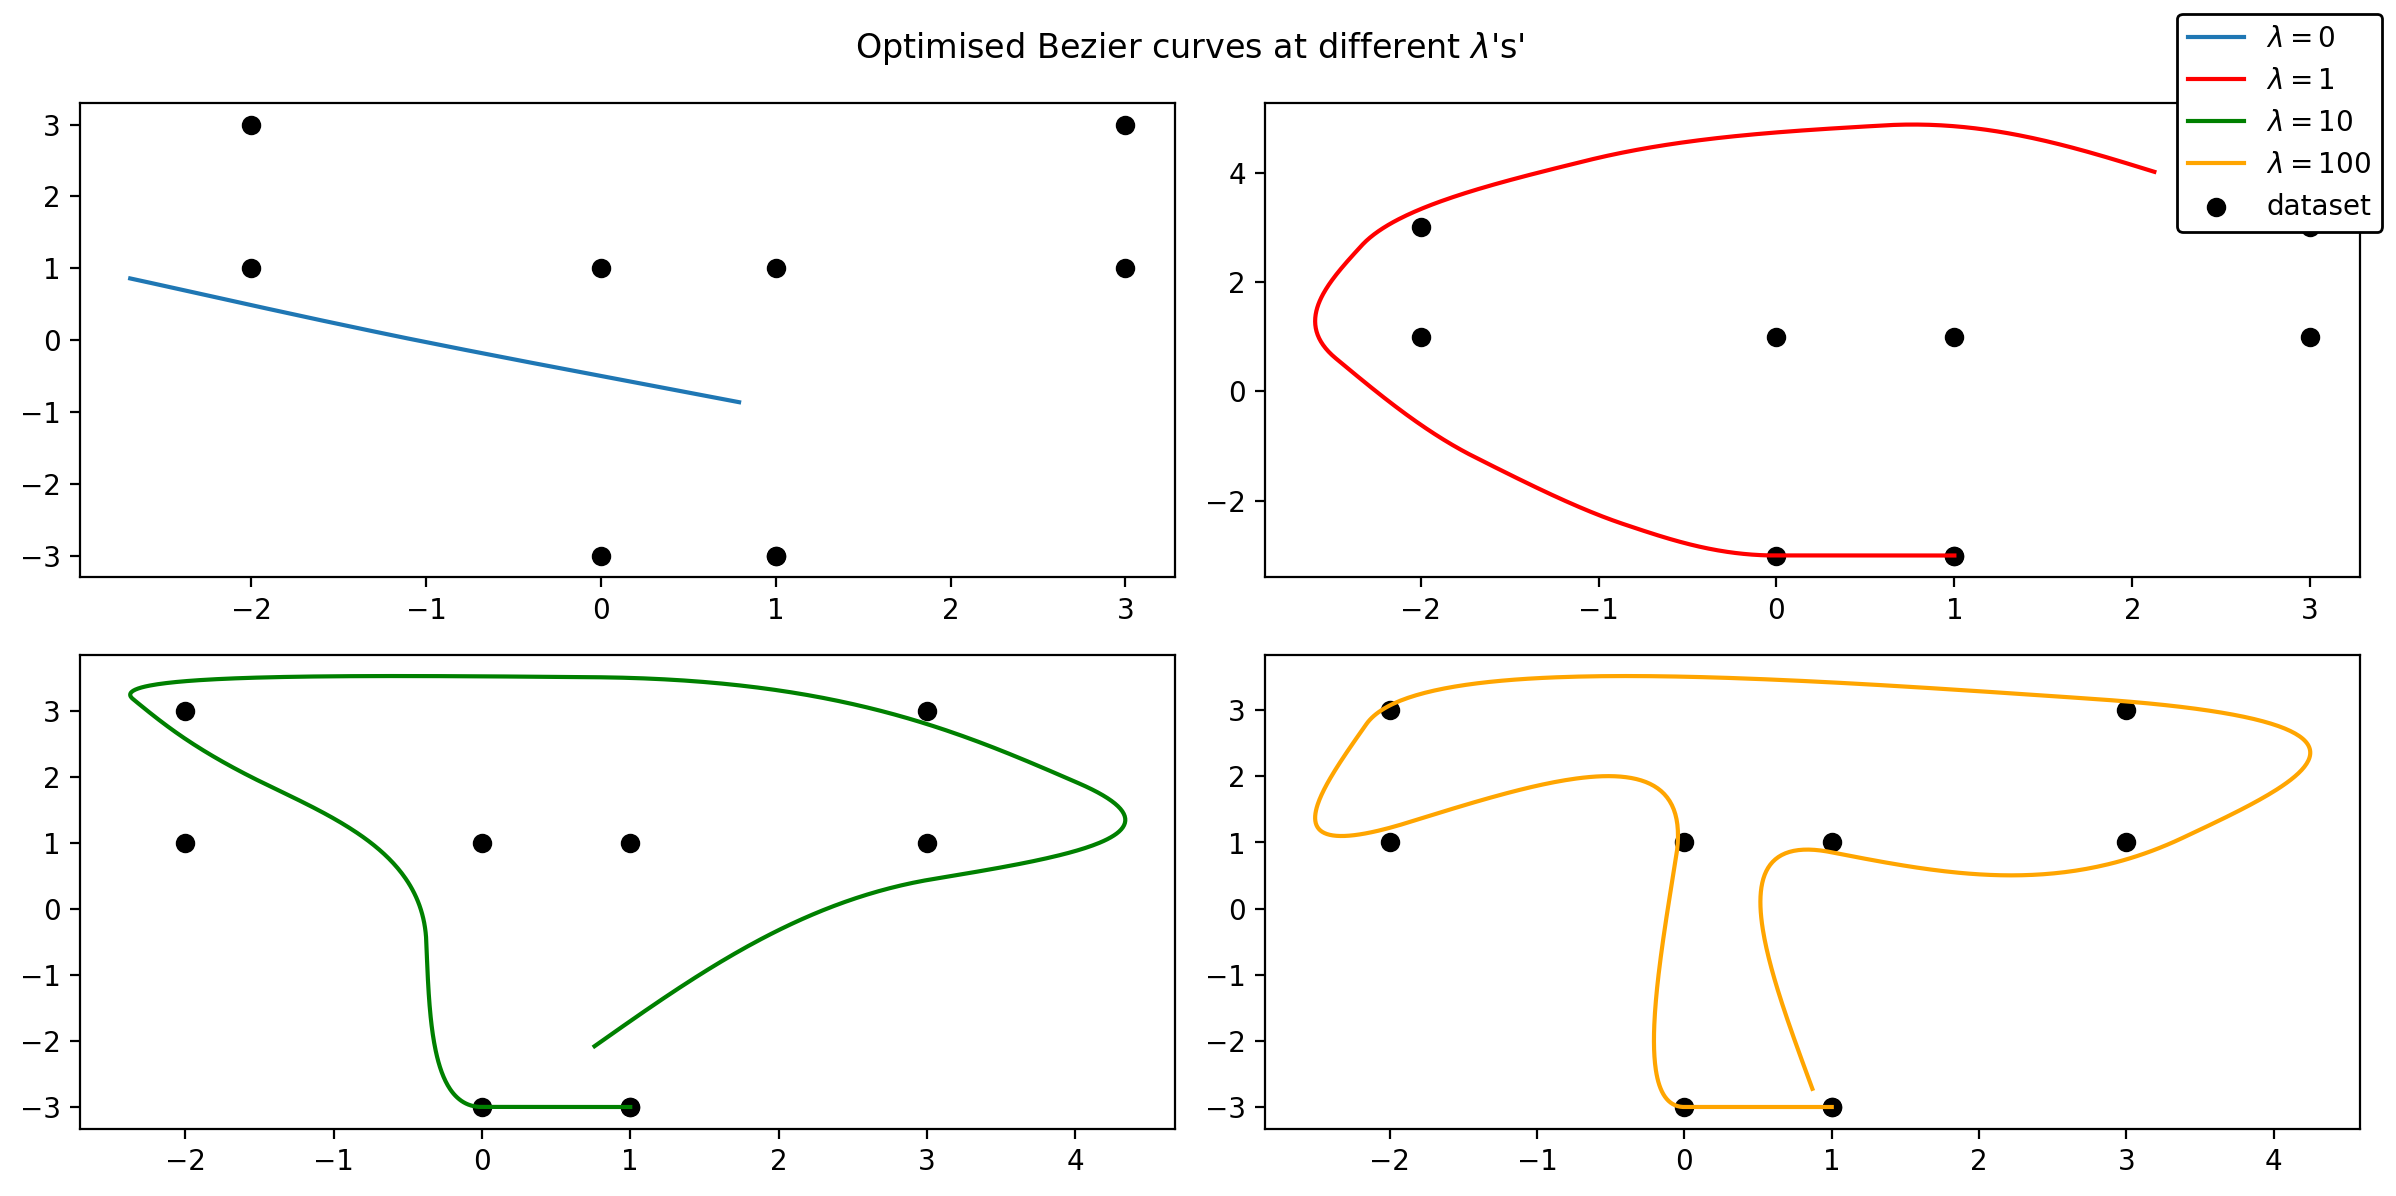

In [30]:
'''Plot of optimised bezier curves'''
fig, axs = plt.subplots(2,2) #make the plot as subplots
axs[0,0].plot(B1[0], B1[1],label =  r'$\lambda = 0$') #plot the curves
axs[0,1].plot(B2[0], B2[1],label =  r'$\lambda = 1$', color = 'red')
axs[1,0].plot(B3[0], B3[1],label =  r'$\lambda = 10$', color = 'green')
axs[1,1].plot(B4[0], B4[1], label = r'$\lambda = 100$', color = 'orange')

for i in range(2):
    for j in range(2):
        if i == 1 and j == 1:
            axs[i,j].scatter(A[:,0],A[:,1], color = 'black', label = 'dataset')
        else:
            axs[i,j].scatter(A[:,0],A[:,1], color = 'black') #plot the dataset in black
            
fig.suptitle(r"Optimised Bezier curves at different $\lambda$'s'") #make the plot look nice
fig.tight_layout()
fig.legend(framealpha = 1,edgecolor = 'black' )
plt.show()

**Observations:**

The datset we have used is the same set of points that were used to make the letter T in problem 3.4.

* When $\lambda$ is zero we got as expected a line, which will have zero acceleration everywhere. The direction of the line is quite arbitary and most likely determined by our random starting value guess in the iteration.
* At $\lambda = 1$  we still get mostly line-ish segments, but it curves slightly so that the distance from the datapoints don't become to large.
* At $\lambda = 10$ we get something that looks more like the curve in problem 3.4, the demand of little acceleration/curvature is getting more neglected and the demand of closeness to the dataset grows. 
* At $\lambda = 100$ the demand of closeness to the datapoints overshadows the demand of little curvature and we get a curve which resembles to a high degree the letter T. 

